Data Shape: (378, 6)
Columns: ['Electronics', 'Groceries', 'Textiles', 'Furniture', 'Pharmacy', 'Motor Vehicles']
            Electronics  Groceries  Textiles  Furniture  Pharmacy  \
Date                                                                
1994-01-01         83.2       72.3     100.0      110.0      44.4   
1994-02-01         83.8       72.2      97.9      109.0      45.3   
1994-03-01         84.0       71.8     102.8      109.1      45.9   
1994-04-01         83.3       71.5      98.0      107.0      45.8   
1994-05-01         82.7       70.7      96.4      106.5      46.5   

            Motor Vehicles  
Date                        
1994-01-01            70.4  
1994-02-01            74.2  
1994-03-01            73.1  
1994-04-01            72.3  
1994-05-01            74.1  


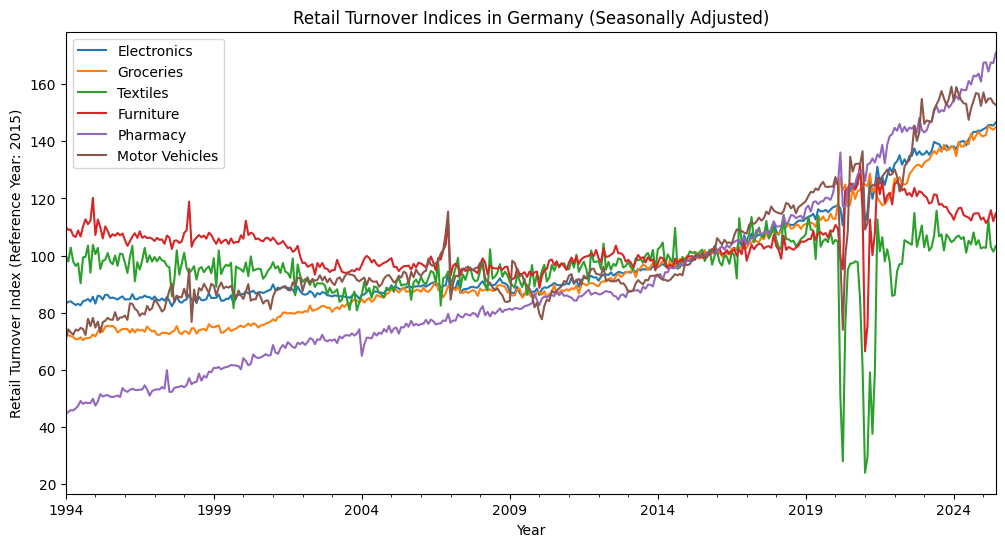

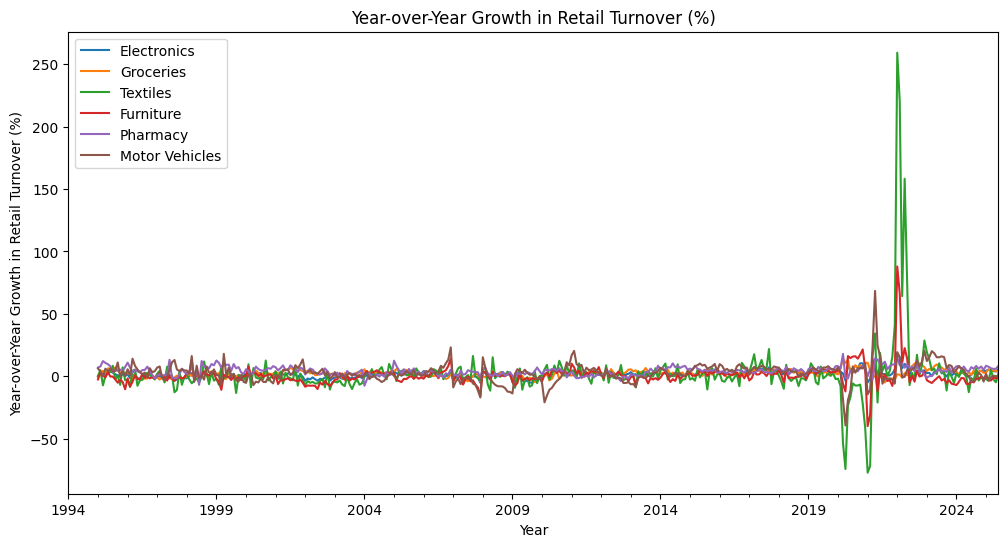

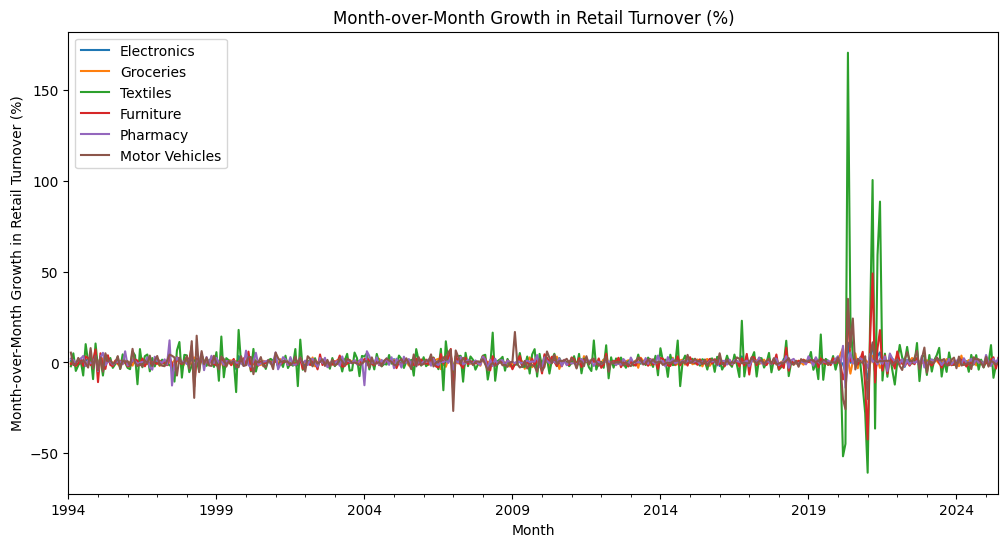

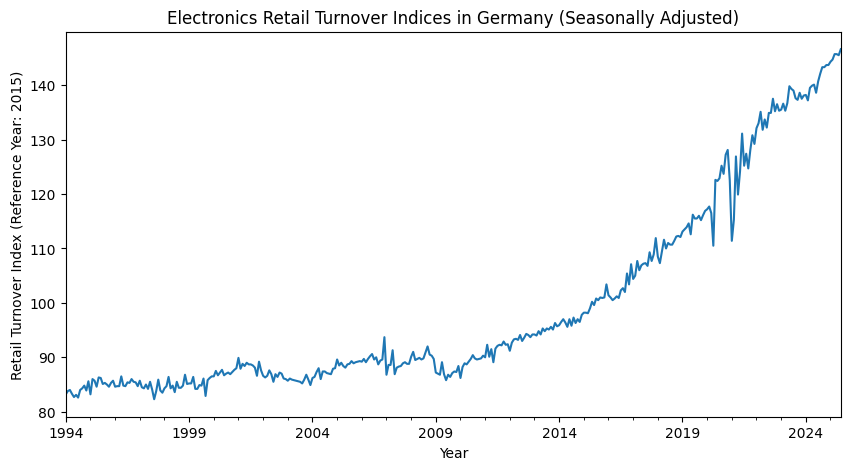

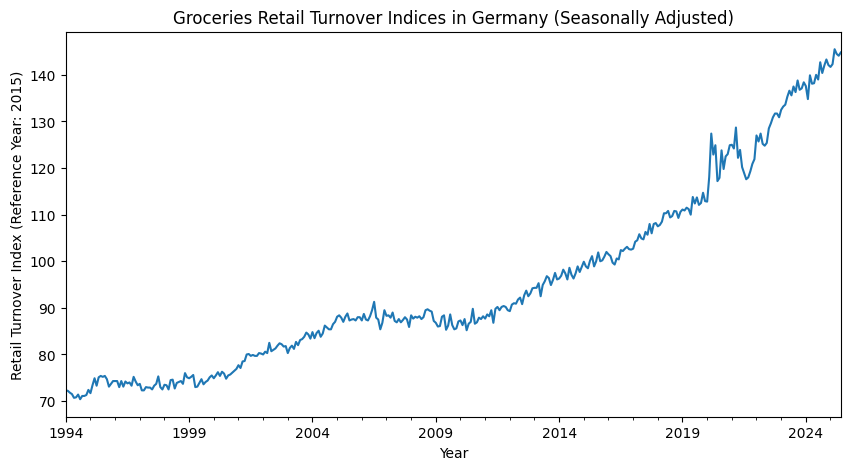

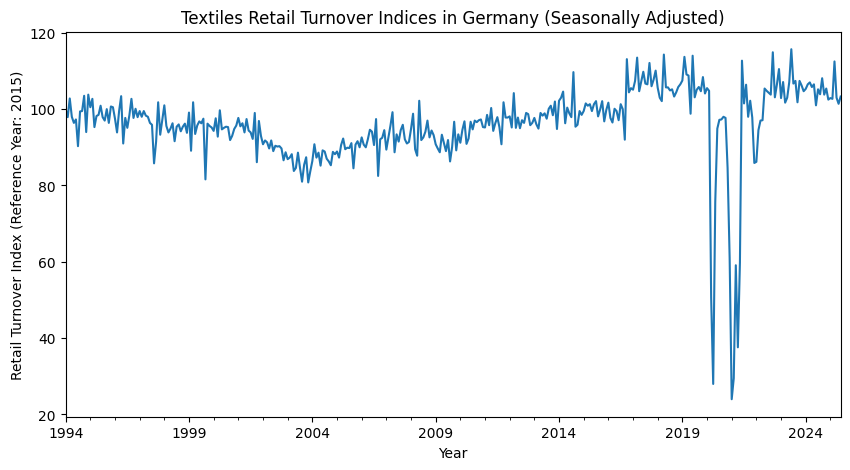

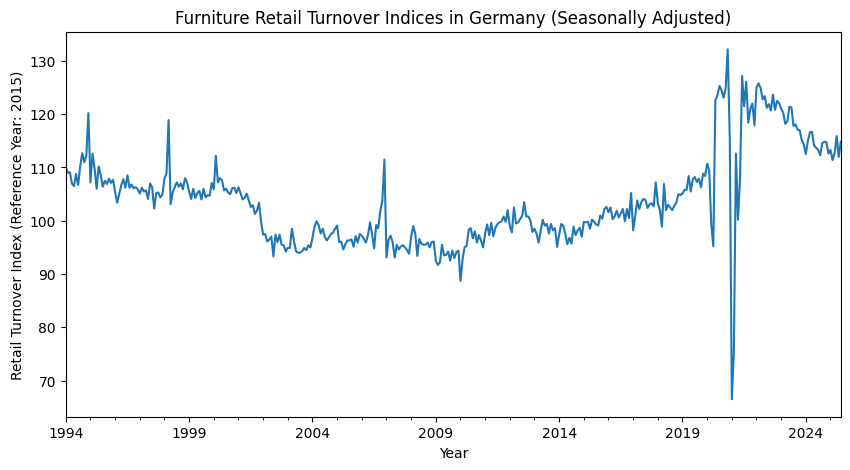

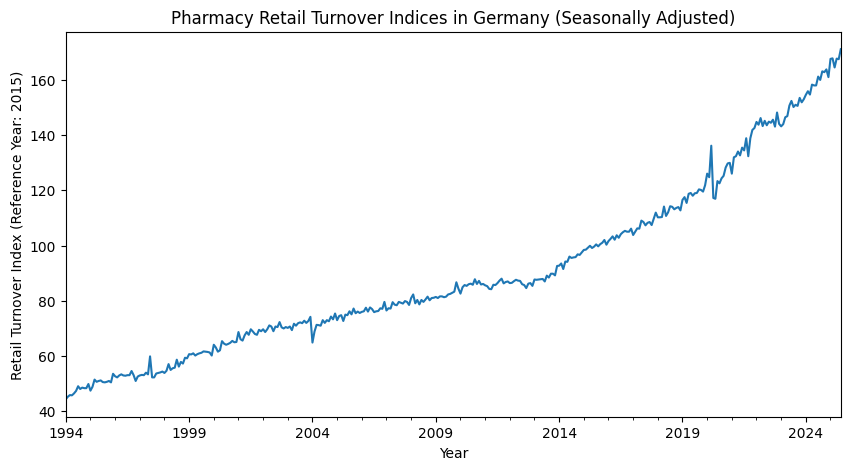

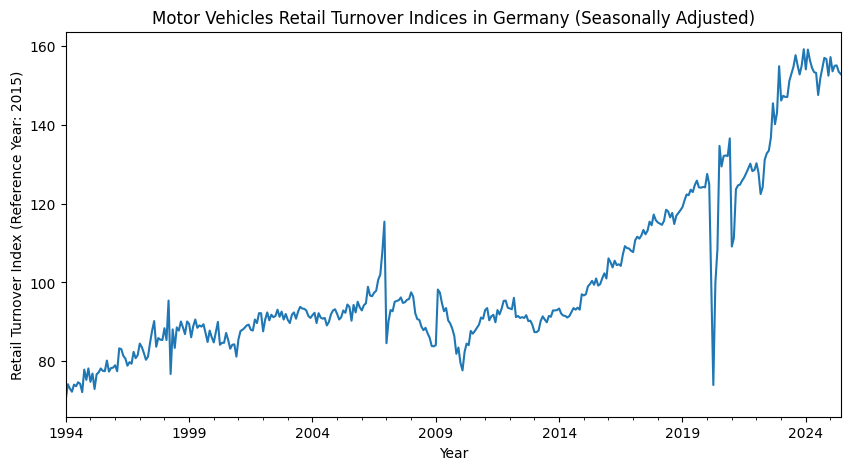

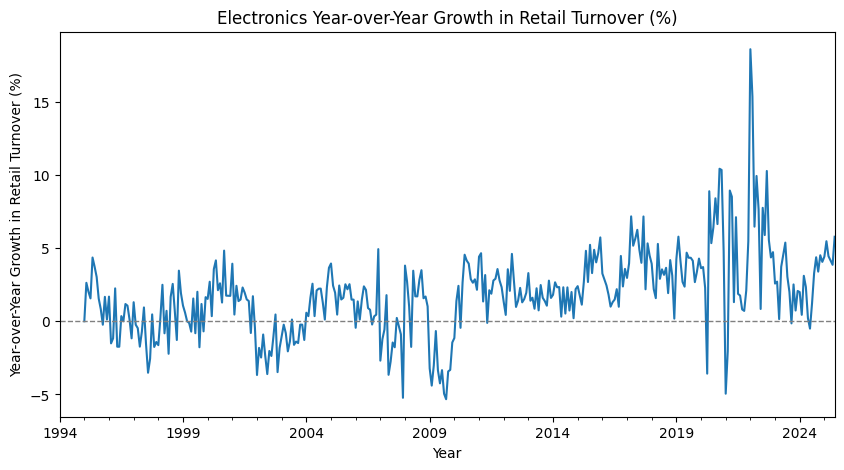

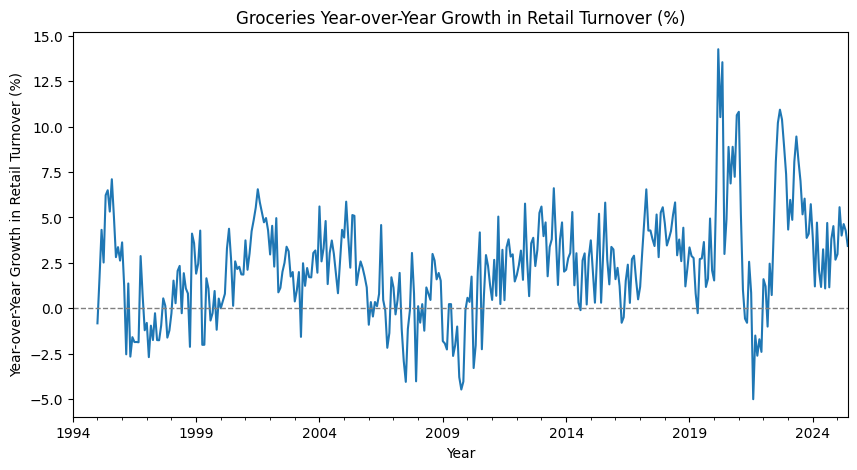

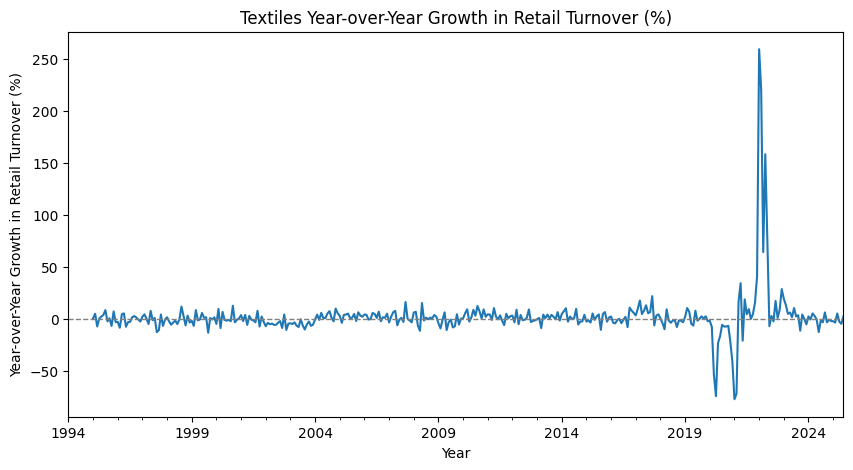

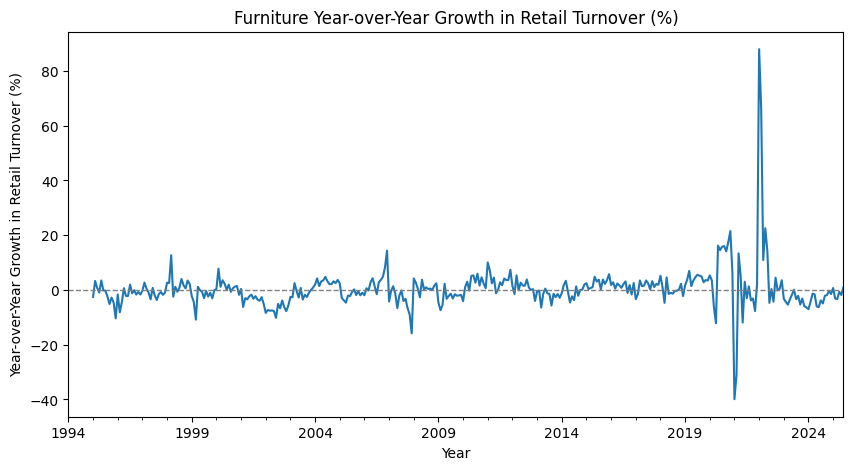

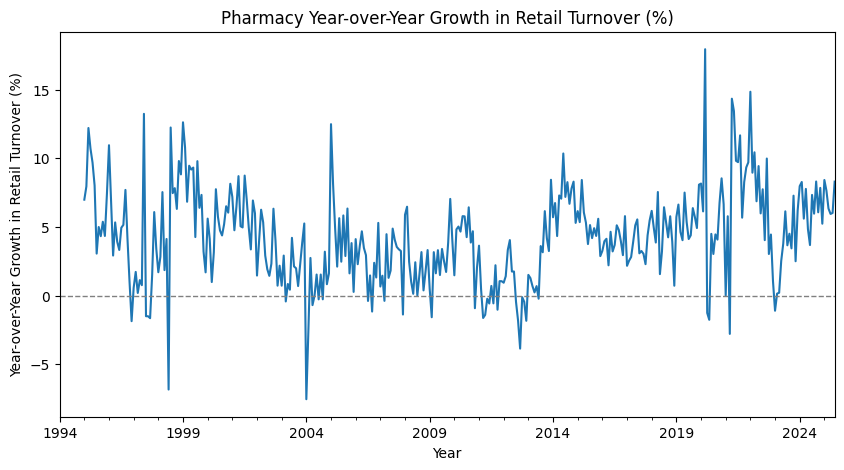

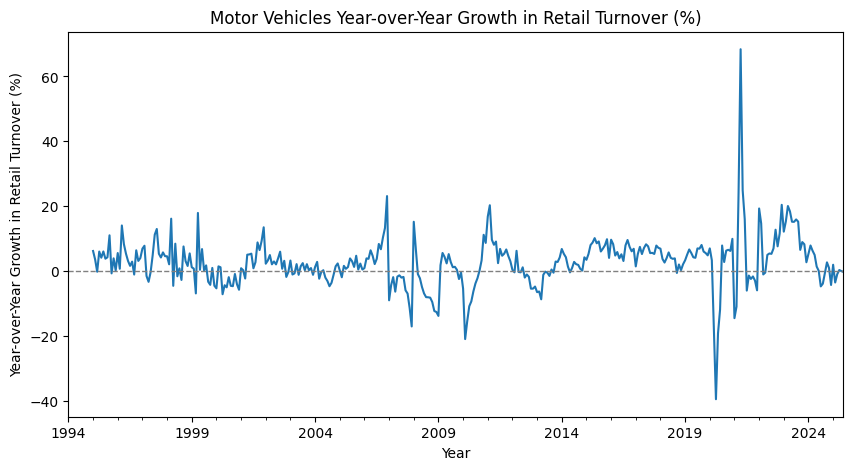

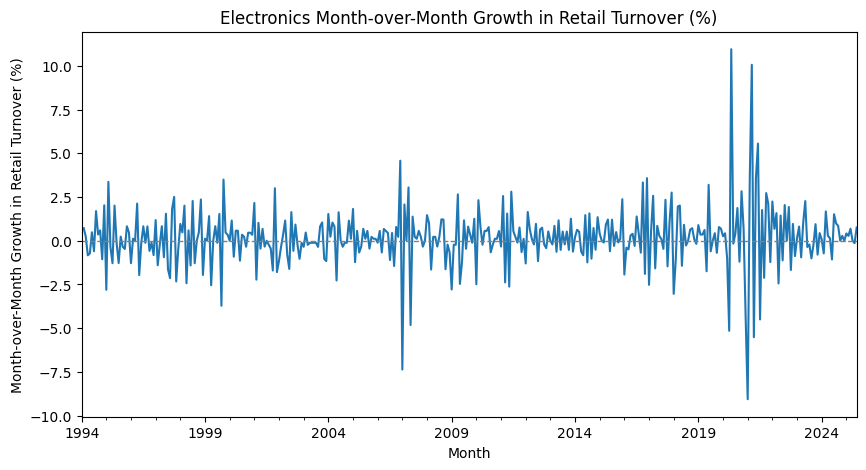

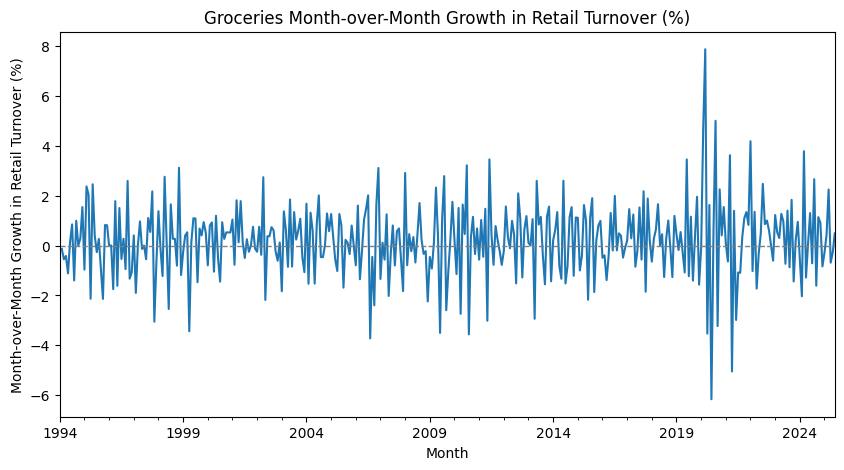

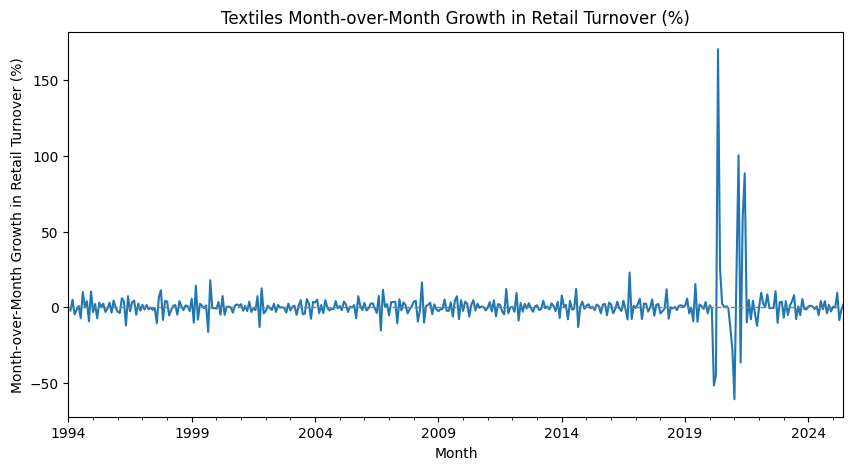

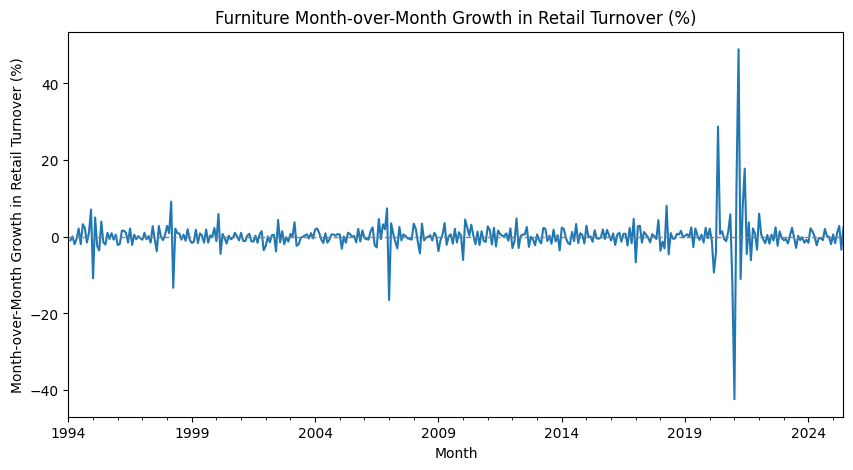

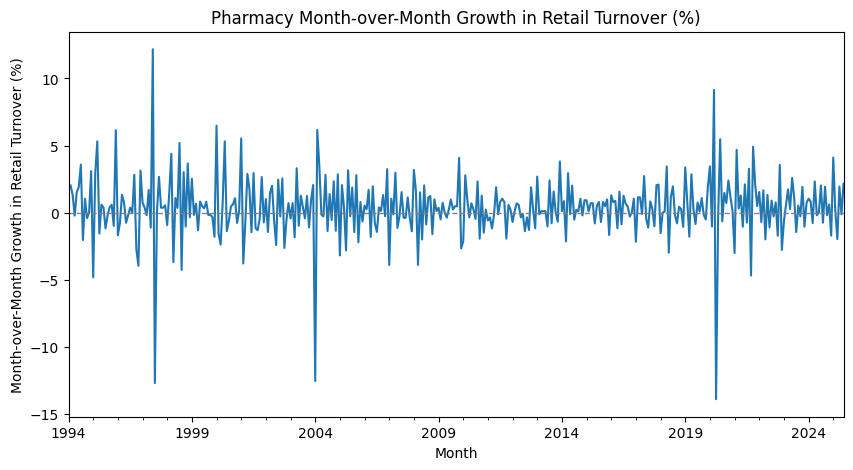

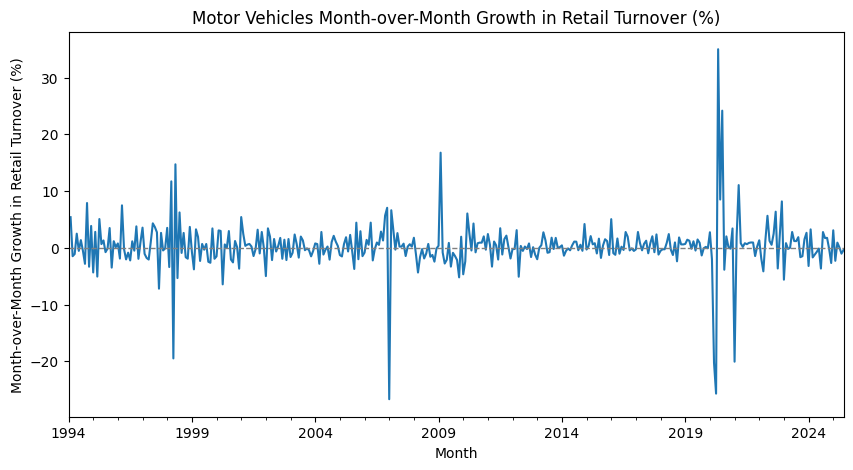

Electronics   Groceries    Textiles   Furniture    Pharmacy  \
count   378.000000  378.000000  378.000000  378.000000  378.000000   
mean     99.090212   95.033333   96.128307  103.719577   90.283862   
std      17.783434   19.834041   10.427601    8.569354   31.202752   
min      82.300000   70.400000   24.000000   66.500000   44.400000   
25%      86.600000   80.125000   92.100000   97.400000   68.900000   
50%      89.800000   88.200000   97.000000  102.350000   82.750000   
75%     107.300000  105.950000  101.800000  107.200000  108.425000   
max     146.600000  145.500000  115.700000  132.200000  171.000000   

       Motor Vehicles  
count      378.000000  
mean       100.966402  
std         21.414226  
min         70.400000  
25%         88.000000  
50%         92.550000  
75%        111.250000  
max        159.100000

In [2]:
############################################################################################
#This notebook includes code for the exploratory data analysis of the retail trade data##### 
#from the Deutsche Bundesbank###############################################################
############################################################################################

#####################################
####Import the libraries#############
#####################################
import pandas as pd
import matplotlib.pyplot as plt
#import matplotlib.dates as mo_dates

#######################################################################################
#####Step 1: Get the dataset from the Bundesbank website and load into a data frame####
#######################################################################################
urls = {
    "Electronics": "https://api.statistiken.bundesbank.de/rest/download/BBDE1/M.DE.Y.GUA1.N2G470000.A.V.I15.A?format=csv&lang=en",
    "Groceries": "https://api.statistiken.bundesbank.de/rest/download/BBDE1/M.DE.Y.GUA1.P2XG71020.A.V.I15.A?format=csv&lang=en",
    "Textiles": "https://api.statistiken.bundesbank.de/rest/download/BBDE1/M.DE.Y.GUA1.P2XG75060.A.V.I15.A?format=csv&lang=en",
    "Furniture": "https://api.statistiken.bundesbank.de/rest/download/BBDE1/M.DE.Y.GUA1.P2XG75064.A.V.I15.A?format=csv&lang=en",
    "Pharmacy" : "https://api.statistiken.bundesbank.de/rest/download/BBDE1/M.DE.Y.GUA1.P2XG75070.A.V.I15.A?format=csv&lang=en",
    "Motor Vehicles": "https://api.statistiken.bundesbank.de/rest/download/BBDE1/M.DE.Y.GUA1.N2G450000.A.V.I15.A?format=csv&lang=en",
    #"Non-market retail": "https://api.statistiken.bundesbank.de/rest/download/BBDE1/M.DE.Y.GUA1.N2G479000.A.V.I15.A?format=csv&lang=en"
}

def load_csv(url, sector):
    df = pd.read_csv(url, skiprows=9) #skipping the metadata rows
    df = df.iloc[:, :2] #separating the column with any trailing elements from the data
    df = df.rename(columns={df.columns[0]: "Date", df.columns[1]: sector})
    df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m",errors="coerce")
    df = df.set_index("Date")
    #df.index = pd.to_datetime(df.index).to_period("M").to_timestamp()
    return df

###############################################################
####Step 2: Form one combined dataset from all the dastasets###
##############################################################
dfs = [load_csv(url, sector) for sector, url in urls.items()]
data = pd.concat(dfs, axis=1)

#############################################
####Step 3: Exploratory Data Analysis########
#############################################
# --------------------------
#Remove NaNs
# --------------------------
data = data.dropna()

# --------------------------
# Inspect coulmns and rows
# --------------------------
print("Data Shape:", data.shape)
print("Columns:", data.columns.tolist())
print(data.head())

# --------------------------
# Plot turnover vs time
# --------------------------
data.plot(figsize=(12,6), title="Retail Turnover Indices in Germany (Seasonally Adjusted)")
plt.ylabel("Retail Turnover Index (Reference Year: 2015)")
plt.xlabel("Year")
plt.show()

# --------------------------
# Plot growth rates (YoY % change)
# --------------------------
data_yoy = data.pct_change(12) * 100
data_yoy.plot(figsize=(12,6), title="Year-over-Year Growth in Retail Turnover (%)")
plt.ylabel("Year-over-Year Growth in Retail Turnover (%)")
plt.xlabel("Year")
plt.show()

# --------------------------
# Plot growth rates (MoM % change)
# --------------------------
data_mom = data.pct_change(1) * 100
data_mom.plot(figsize=(12,6), title="Month-over-Month Growth in Retail Turnover (%)")
plt.ylabel("Month-over-Month Growth in Retail Turnover (%)")
plt.xlabel("Month") # Need to fix this still showing Yearly Format!!
plt.show()

# --------------------------
# Plot turnover vs time for each column
# --------------------------
for col in data.columns:
    data[col].plot(figsize=(10,5), title=f"{col} Retail Turnover Indices in Germany (Seasonally Adjusted)")
    plt.ylabel("Retail Turnover Index (Reference Year: 2015)")
    plt.xlabel("Year")
    plt.show()

# --------------------------
# Plot growth rates (YOY % change) vs time for each column
# --------------------------
for col in data_yoy.columns:
    data_yoy[col].plot(figsize=(10,5), title=f"{col} Year-over-Year Growth in Retail Turnover (%)")
    plt.ylabel("Year-over-Year Growth in Retail Turnover (%)")
    plt.xlabel("Year")
    plt.axhline(0, color="gray", linestyle="--", linewidth=1)  # mark zero growth
    plt.show()

# --------------------------
# Plot growth rates (MOM % change) vs time for each column
# --------------------------
for col in data_mom.columns:
    data_mom[col].plot(figsize=(10,5), title=f"{col} Month-over-Month Growth in Retail Turnover (%)")
    plt.ylabel("Month-over-Month Growth in Retail Turnover (%)")
    plt.xlabel("Month") # Need to fix this still showing Yearly Format!!
    plt.axhline(0, color="gray", linestyle="--", linewidth=1)
    plt.show()

# --------------------------
# Summary statistics
# --------------------------
display(data.describe())

In [2]:
############################################################################################
### Step 4: Construct Target and Feature Variables ########################################
############################################################################################

# --------------------------
# Target: Up_6m_YoY(t)
# --------------------------
# Definition:
#   1 if Index(t+6) > Index(t-6), relative to Index(t-6) (i.e. YoY at t+6 is positive),
#   else 0

def build_target(df, sector):
    """
    Builds binary target Up_6m_YoY for a given sector
    """
    idx = df[sector]
    yoy_forward = (idx.shift(-6) - idx.shift(6)) / idx.shift(6) * 100
    target = (yoy_forward > 0).astype(int).rename(f"{sector}_target")
    return target

# Build targets for all sectors
targets = [build_target(data, sector) for sector in data.columns]
targets = pd.concat(targets, axis=1)

# --------------------------
# Features
# --------------------------
features = pd.DataFrame(index=data.index)

for sector in data.columns:
    # 1. Indices at different lags
    #features[f"{sector}_t"]   = data[sector]
    #features[f"{sector}_t-1"] = data[sector].shift(1)
    features[f"{sector}_t-12"] = data[sector].shift(12)

    # 2. Growth rates
    features[f"{sector}_YoY"] = data[sector].pct_change(12) * 100
    features[f"{sector}_MoM"] = data[sector].pct_change(1) * 100

    # 3. Rolling 12-month std dev (volatility)
    features[f"{sector}_vol_12m"] = data[sector].pct_change(1).rolling(12).std()

    # 4. Cumulative Growth (6-month horizon)
    features[f"{sector}_CumGrowth_6m"] = (
        (data[sector].pct_change(1) + 1).rolling(6).apply(lambda x: x.prod() - 1)) * 100

    # 5. Rolling Ratio: 3M MA / 12M MA
    #features[f"{sector}_Ratio_3m_12m"] = (
        #data[sector].rolling(3).mean() / data[sector].rolling(12).mean())

    # 6. Rolling Max & Min (6-month window)
    features[f"{sector}_RollMax_6m"] = data[sector].rolling(6).max()
    features[f"{sector}_RollMin_6m"] = data[sector].rolling(6).min()

# 4. Seasonality (month of year)
features["Month"] = data.index.month

# --------------------------
# Combine Features + Targets
# --------------------------
dataset = pd.concat([features, targets], axis=1).dropna()

print("Final dataset shape:", dataset.shape)
print(dataset.head(20))

Final dataset shape: (366, 49)
            Electronics_t-12  Electronics_YoY  Electronics_MoM  \
Date                                                             
1995-01-01              83.2         0.000000        -2.803738   
1995-02-01              83.8         2.625298         3.365385   
1995-03-01              84.0         2.023810        -0.348837   
1995-04-01              83.3         1.560624        -1.283547   
1995-05-01              82.7         4.353083         2.009456   
1995-06-01              83.1         3.730445        -0.115875   
1995-07-01              82.6         3.026634        -1.276102   
1995-08-01              84.0         1.547619         0.235018   
1995-09-01              84.3         0.830368        -0.351700   
1995-10-01              84.8        -0.235849        -0.470588   
1995-11-01              83.9         1.668653         0.827423   
1995-12-01              85.6         0.116822         0.468933   
1996-01-01              83.2         1.682692

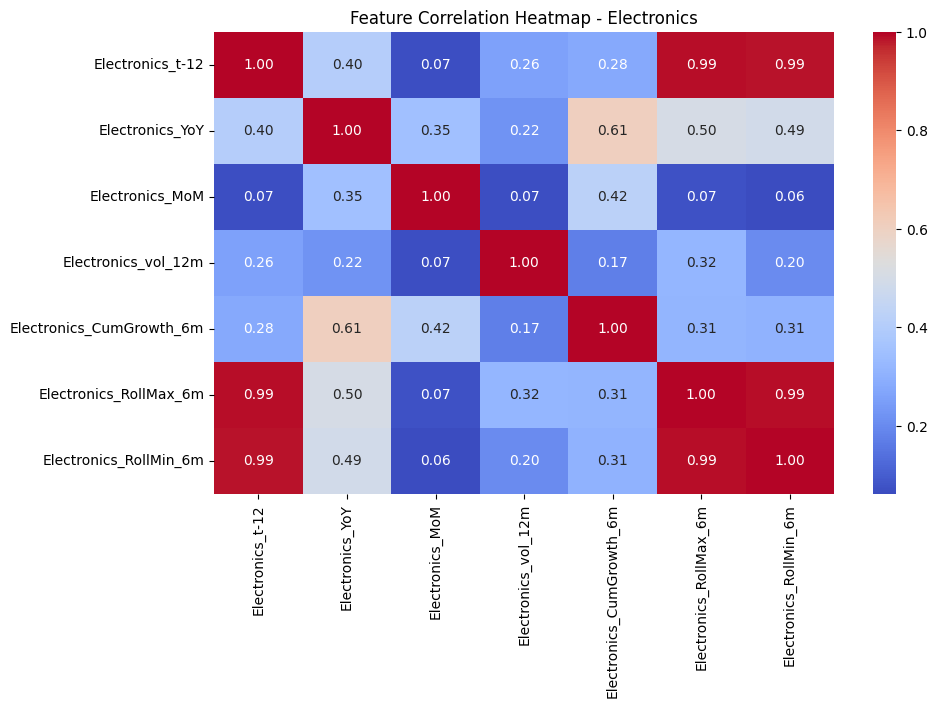

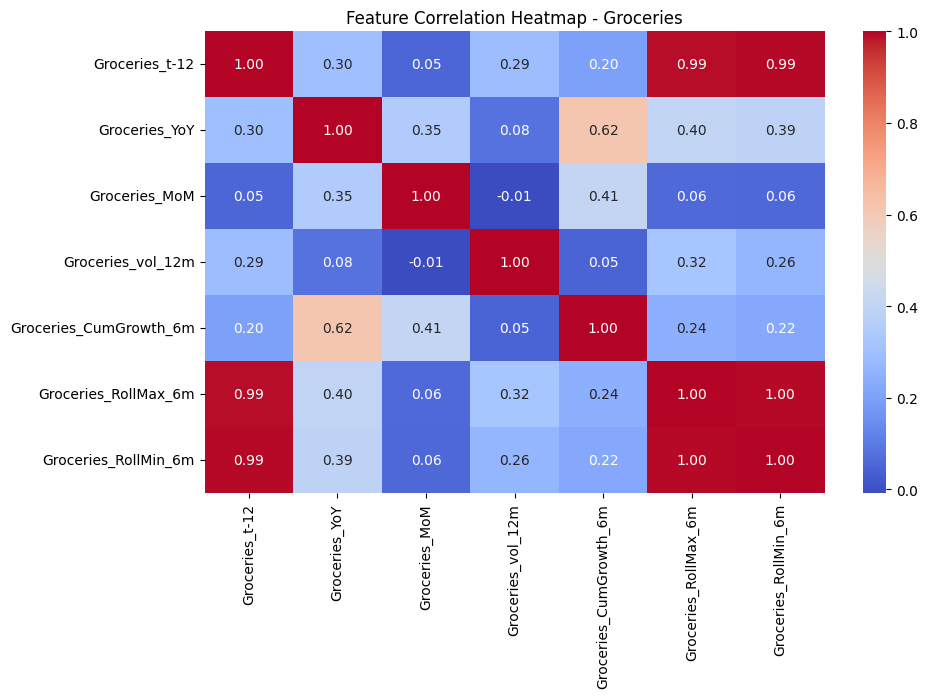

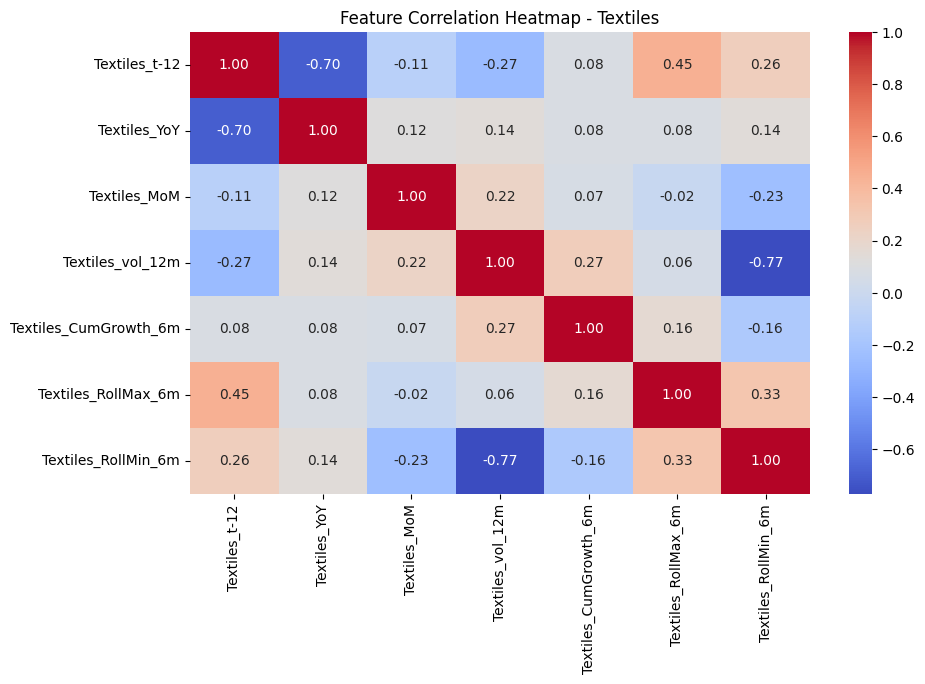

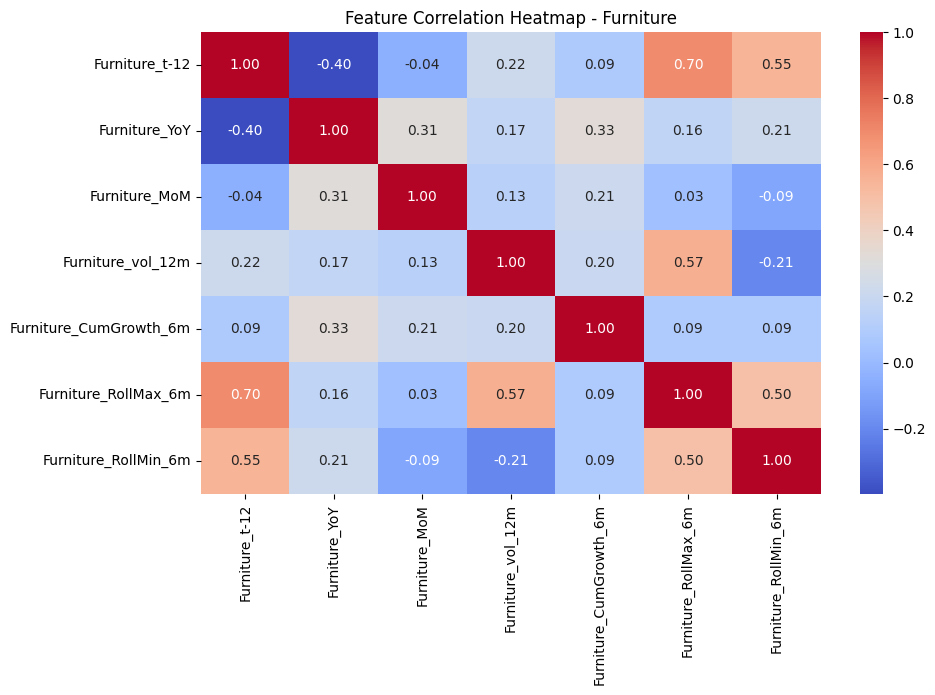

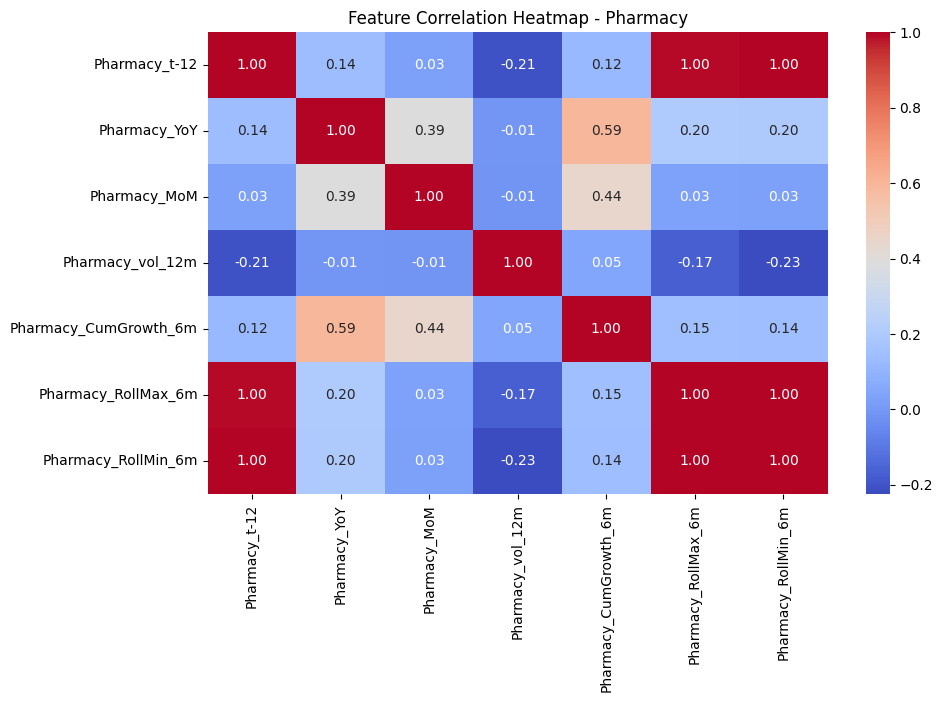

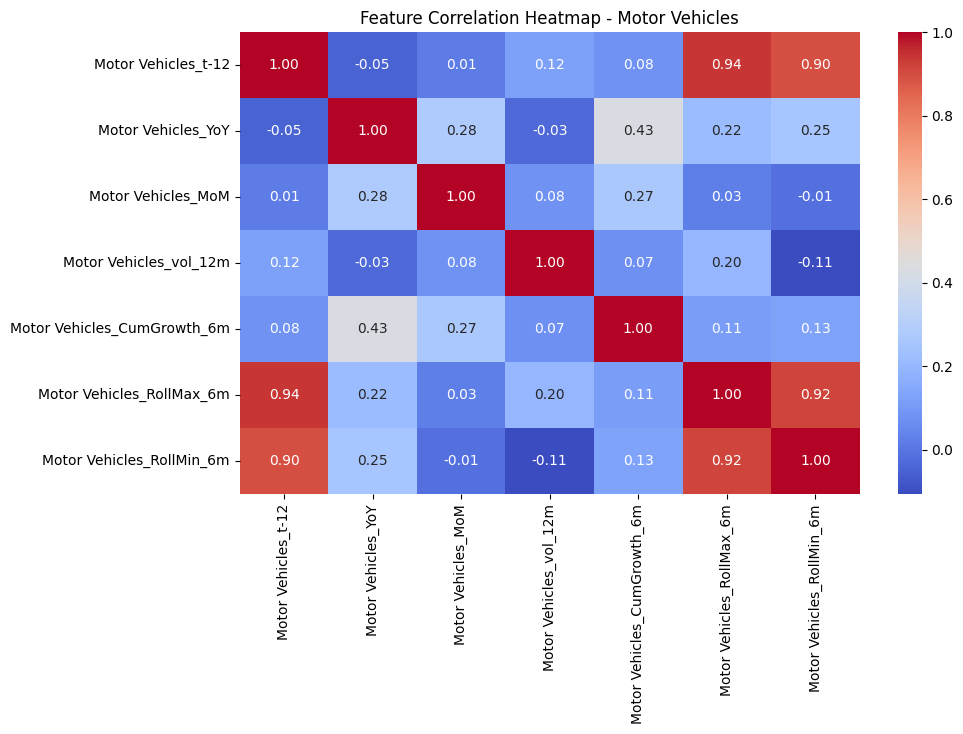

In [3]:
############################################################################################
### Step 5: Correlation Analysis ##########################################################
############################################################################################
#sector_dummies = pd.get_dummies(dataset['Sector'], prefix="Sector")
#corr_df = pd.concat([dataset.drop(columns="Sector"), sector_dummies], axis=1)
#corr = corr_df.corr()
import seaborn as seab

for sector in data.columns:
    # Select features + target for this sector
    cols = [c for c in dataset.columns if c.startswith(sector)]
    sector_df = dataset[cols]

    # Drop target from correlation
    if f"{sector}_target" in sector_df.columns:
        sector_features = sector_df.drop(columns=[f"{sector}_target"])
    else:
        sector_features = sector_df

    corr = sector_features.corr()

    plt.figure(figsize=(10,6))
    seab.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title(f"Feature Correlation Heatmap - {sector}")
    plt.show()

/usr/local/python/3.10.18/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
14:31:16 - cmdstanpy - INFO - Chain [1] start processing
14:31:16 - cmdstanpy - INFO - Chain [1] done processing


Prophet Baseline for Furniture: Accuracy=0.607, ROC-AUC=0.609


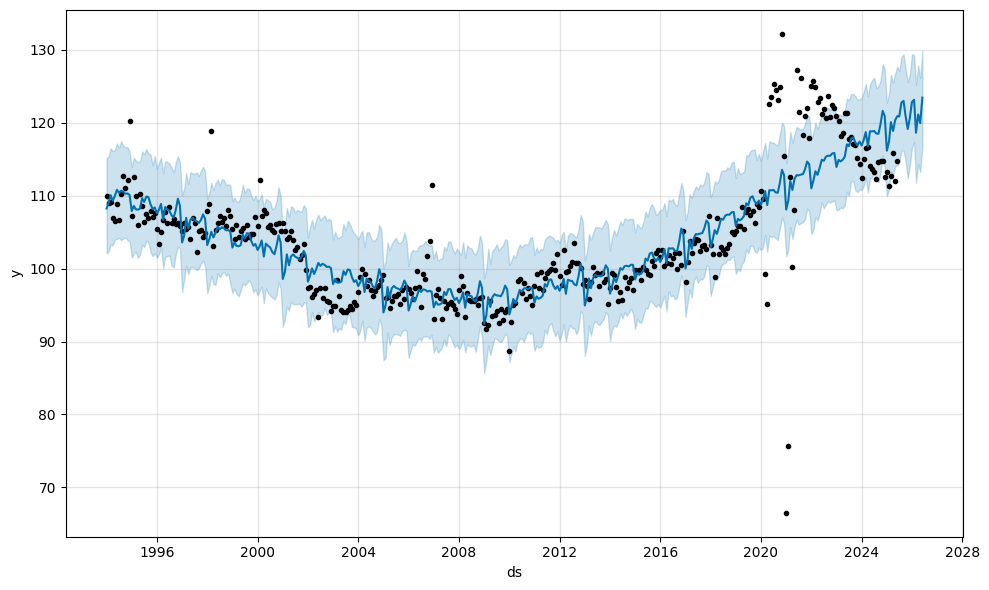

In [4]:
######################################################################################
### Step 11: Should have done this before, Testing Prophet ############################
######################################################################################
from prophet import Prophet

# Prepare data for Prophet (expects columns 'ds' and 'y')
#sector = "Electronics"
#sector = "Groceries"
#sector = "Textiles"
#sector = "Pharmacy"
#sector = "Motor Vehicles"
sector = "Furniture"
df_prophet = data[[sector]].reset_index()
df_prophet.columns = ["ds", "y"]

# Initialize and fit model
model = Prophet()
model.fit(df_prophet)

# Forecast 12 months ahead
future = model.make_future_dataframe(periods=12, freq="ME")
forecast = model.predict(future)

# Plot forecast
fig = model.plot(forecast)
#model.xlabel("Year")
#model.ylabel("Index")

forecast_df = forecast[["ds", "yhat"]].set_index("ds")

# Align with original timeline
prophet_pred = forecast_df.join(data[[sector]], how="left")

# Prophet directional signal: if forecast(t+6) > forecast(t-6) → 1, else 0
prophet_pred["Up_6m_YoY_pred"] = (
    (prophet_pred["yhat"].shift(-6) - prophet_pred["yhat"].shift(6)) / prophet_pred["yhat"].shift(6)
).apply(lambda x: 1 if x > 0 else 0)

# True target from your earlier code
true_target = dataset[f"{sector}_target"]

# Align Prophet signal with true target
comparison = pd.DataFrame({
    "True": true_target,
    "Prophet_pred": prophet_pred["Up_6m_YoY_pred"]
}).dropna()

# Metrics
from sklearn.metrics import accuracy_score, roc_auc_score

acc = accuracy_score(comparison["True"], comparison["Prophet_pred"])
auc = roc_auc_score(comparison["True"], comparison["Prophet_pred"])

print(f"Prophet Baseline for {sector}: Accuracy={acc:.3f}, ROC-AUC={auc:.3f}")


=== Training models for Electronics ===

=== Training models for Groceries ===

=== Training models for Textiles ===

=== Training models for Furniture ===

=== Training models for Pharmacy ===

=== Training models for Motor Vehicles ===

=== Comparing models for Electronics ===


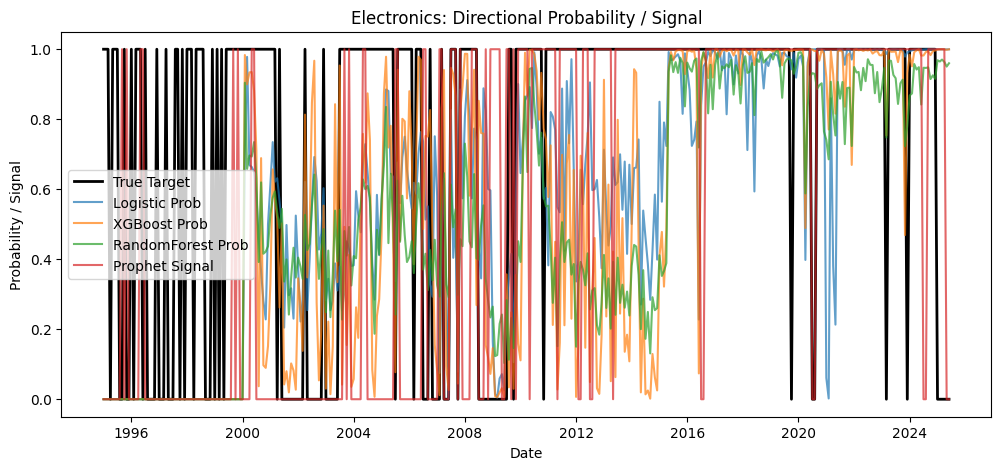


=== Comparing models for Groceries ===


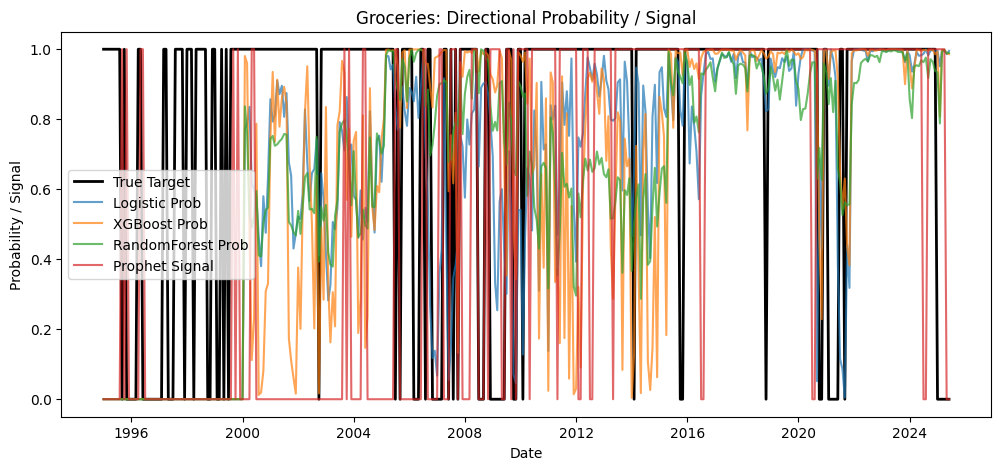


=== Comparing models for Textiles ===


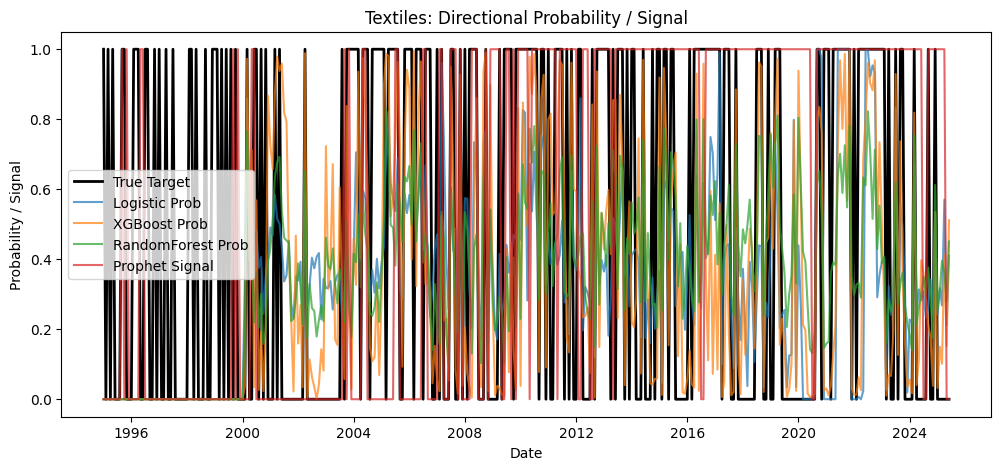


=== Comparing models for Furniture ===


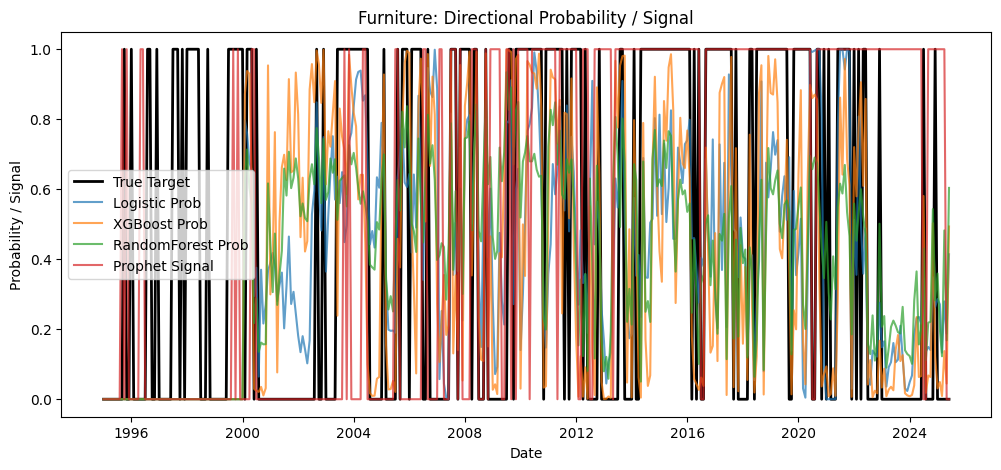


=== Comparing models for Pharmacy ===


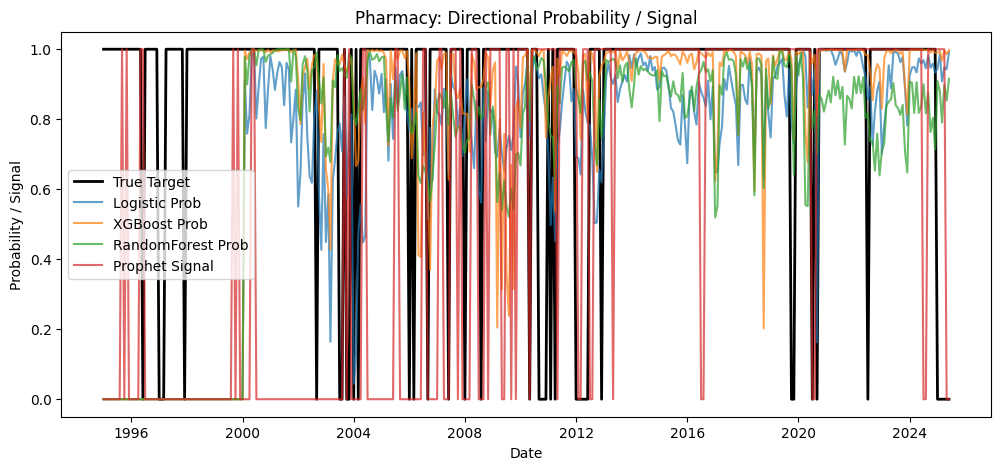


=== Comparing models for Motor Vehicles ===


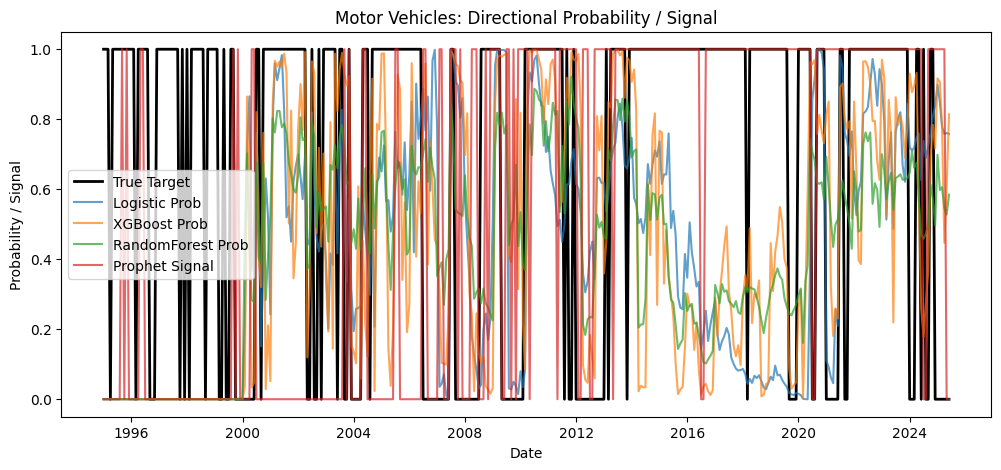


=== Model Comparison Results ===
                             Accuracy  ROC-AUC  ErrorRate
Sector         Model                                     
Electronics    Logistic         0.716    0.702      0.284
               Prophet          0.680    0.701      0.320
               RandomForest     0.620    0.677      0.380
               XGBoost          0.658    0.687      0.342
Furniture      Logistic         0.710    0.706      0.290
               Prophet          0.607    0.609      0.393
               RandomForest     0.667    0.665      0.333
               XGBoost          0.672    0.669      0.328
Groceries      Logistic         0.743    0.693      0.257
               Prophet          0.590    0.582      0.410
               RandomForest     0.710    0.584      0.290
               XGBoost          0.653    0.580      0.347
Motor Vehicles Logistic         0.538    0.551      0.462
               Prophet          0.574    0.559      0.426
               RandomForest     0.503 

In [5]:
#################################################################
### Step 6: Unified Model Comparison Plots & Graphs #
#################################################################

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Define sectors
sectors = [c for c in data.columns]

# Store results for comparison
results = []

# ==============================
# 1. Random Forest, XGBoost & Logistic Regression Training
# ==============================
rf_params = {
    "n_estimators": 300,
    "max_depth": None,
    "max_features": "sqrt",
    "min_samples_split": 5,
    "min_samples_leaf": 2,
    "bootstrap": True,
    "random_state": 42,
    "n_jobs": -1
}

xgb_params = {
    "n_estimators": 200,
    "max_depth": 3,
    "learning_rate": 0.1,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "random_state": 42,
    "eval_metric": "logloss",
    "enable_categorical": True
}

rf_signals = {}
xgb_signals = {}
lr_signals = {}
lr_probs = {}
rf_probs = {}
xgb_probs = {}

for sector in sectors:
    print(f"\n=== Training models for {sector} ===")
    
    # Features & target
    X = dataset[[col for col in dataset.columns if col.startswith(sector) and not col.endswith("_target")] + ["Month"]]
    y = dataset[f"{sector}_target"]
    
    # Logistic Regression encoding
    month_ohe = pd.get_dummies(X["Month"], prefix="Month")
    X_lr = pd.concat([X.drop(columns=["Month"]), month_ohe], axis=1)
    numeric_cols = X_lr.columns.difference(month_ohe.columns)
    scaler = StandardScaler()
    X_lr[numeric_cols] = scaler.fit_transform(X_lr[numeric_cols])
    
    tscv = TimeSeriesSplit(n_splits=5)
    
    prob_all_lr = np.zeros(len(y))
    prob_all_rf = np.zeros(len(y))
    prob_all_xgb = np.zeros(len(y))
    
    for train_idx, test_idx in tscv.split(X):
        X_train_lr, X_test_lr = X_lr.iloc[train_idx], X_lr.iloc[test_idx]
        X_train_rf, X_test_rf = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        # Logistic Regression
        lr_model = LogisticRegression(max_iter=1000, solver='liblinear', penalty='l1', C=1.0, random_state=42)
        lr_model.fit(X_train_lr, y_train)
        prob_all_lr[test_idx] = lr_model.predict_proba(X_test_lr)[:,1]
        
        # Random Forest
        rf_model = RandomForestClassifier(**rf_params)
        rf_model.fit(X_train_rf, y_train)
        prob_all_rf[test_idx] = rf_model.predict_proba(X_test_rf)[:,1]
        
        # XGBoost
        xgb_model = xgb.XGBClassifier(**xgb_params)
        xgb_model.fit(X_train_rf, y_train)
        prob_all_xgb[test_idx] = xgb_model.predict_proba(X_test_rf)[:,1]
    
    # Store signals
    lr_signals[sector] = (prob_all_lr > 0.5).astype(int)
    rf_signals[sector] = (prob_all_rf > 0.5).astype(int)
    xgb_signals[sector] = (prob_all_xgb > 0.5).astype(int)
    
    # Store probabilities for plotting
    lr_probs[sector] = prob_all_lr
    rf_probs[sector] = prob_all_rf
    xgb_probs[sector] = prob_all_xgb

# ==============================
# 2. Compare All Models & Metrics
# ==============================
for sector in sectors:
    print(f"\n=== Comparing models for {sector} ===")
    y_true = dataset[f"{sector}_target"].iloc[:len(rf_signals[sector])]
    
    prophet_signal = prophet_pred["Up_6m_YoY_pred"].loc[y_true.index].values
    
    model_preds = {
        "Logistic": lr_signals[sector],
        "XGBoost": xgb_signals[sector],
        "RandomForest": rf_signals[sector],
        "Prophet": prophet_signal
    }
    
    # Compute metrics
    for model_name, pred in model_preds.items():
        acc = accuracy_score(y_true, pred)
        auc = roc_auc_score(y_true, pred)
        error_rate = 1 - acc
        results.append({
            "Sector": sector,
            "Model": model_name,
            "Accuracy": acc,
            "ROC-AUC": auc,
            "ErrorRate": error_rate
        })
    
    # ==============================
    # 3. Plot directional probability for each model
    # ==============================
    plt.figure(figsize=(12,5))
    plt.plot(y_true.index, y_true, label="True Target", color="black", linewidth=2)
    plt.plot(y_true.index, lr_probs[sector], label="Logistic Prob", alpha=0.7)
    plt.plot(y_true.index, xgb_probs[sector], label="XGBoost Prob", alpha=0.7)
    plt.plot(y_true.index, rf_probs[sector], label="RandomForest Prob", alpha=0.7)
    plt.plot(y_true.index, prophet_signal, label="Prophet Signal", alpha=0.7)
    plt.title(f"{sector}: Directional Probability / Signal")
    plt.xlabel("Date")
    plt.ylabel("Probability / Signal")
    plt.legend()
    plt.show()

# ==============================
# 4. Summarize Results
# ==============================
results_df = pd.DataFrame(results)
print("\n=== Model Comparison Results ===")
print(results_df.groupby(["Sector", "Model"]).mean().round(3))



=== Model Comparison Results ===
                             Accuracy  ROC-AUC  ErrorRate
Sector         Model                                     
Electronics    Logistic         0.716    0.702      0.284
               Prophet          0.680    0.701      0.320
               RandomForest     0.620    0.677      0.380
               XGBoost          0.658    0.687      0.342
Furniture      Logistic         0.710    0.706      0.290
               Prophet          0.607    0.609      0.393
               RandomForest     0.667    0.665      0.333
               XGBoost          0.672    0.669      0.328
Groceries      Logistic         0.743    0.693      0.257
               Prophet          0.590    0.582      0.410
               RandomForest     0.710    0.584      0.290
               XGBoost          0.653    0.580      0.347
Motor Vehicles Logistic         0.538    0.551      0.462
               Prophet          0.574    0.559      0.426
               RandomForest     0.503 

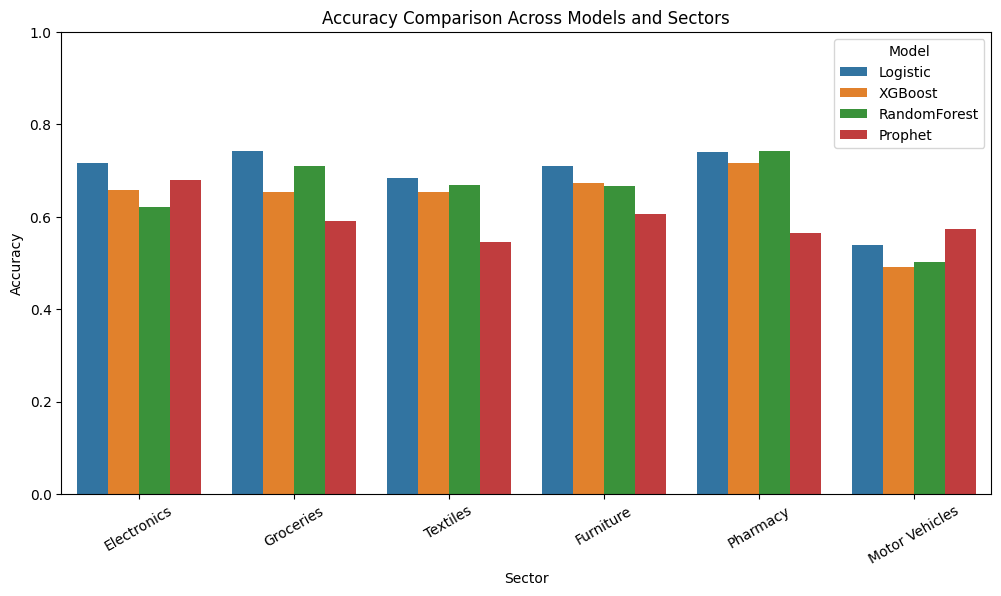

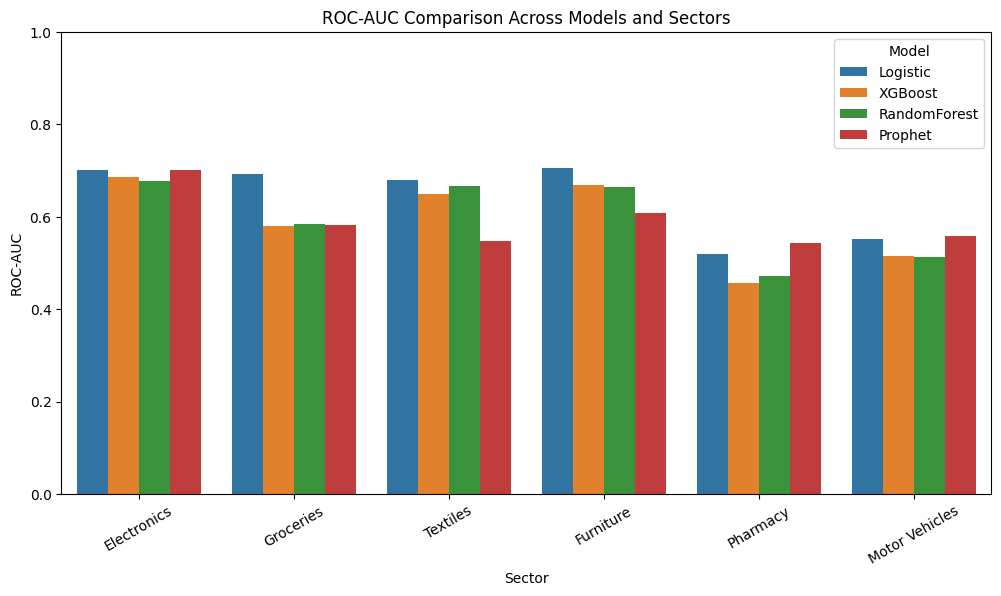

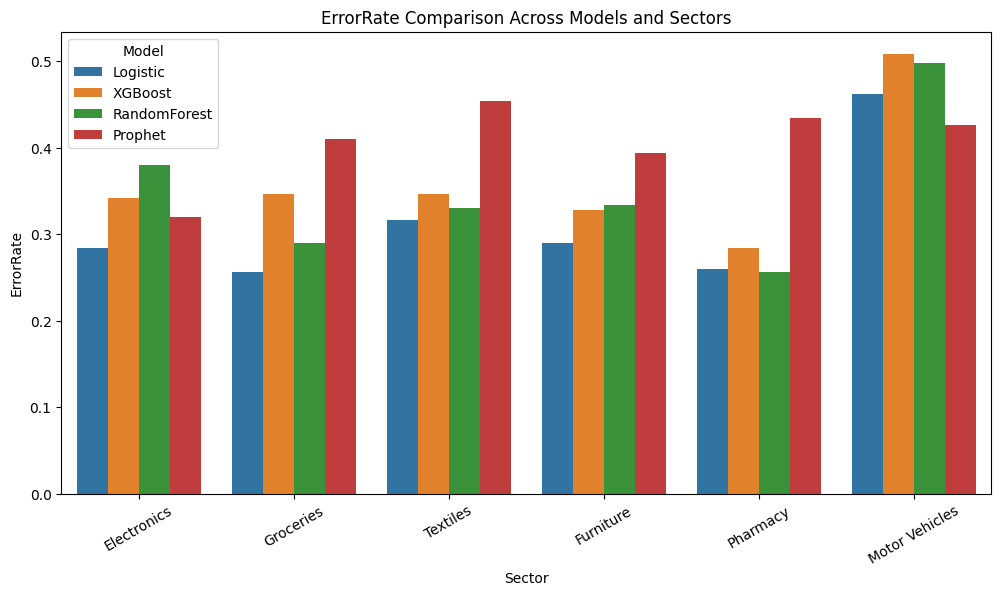

In [8]:
#################################################################
### Step 7: Model Comparison Plots by Metric ########
#################################################################

import seaborn as sns

# ==============================
# Summarize Results
# ==============================
results_df = pd.DataFrame(results)

print("\n=== Model Comparison Results ===")
print(results_df.groupby(["Sector", "Model"]).mean().round(3))

# ==============================
# Unified Plots (One per Metric)
# ==============================
metrics = ["Accuracy", "ROC-AUC", "ErrorRate"]

for metric in metrics:
    plt.figure(figsize=(12,6))
    sns.barplot(
        data=results_df,
        x="Sector",
        y=metric,
        hue="Model"
    )
    plt.title(f"{metric} Comparison Across Models and Sectors")
    plt.ylabel(metric)
    if metric != "ErrorRate":
        plt.ylim(0, 1)   # keep scale consistent
    plt.legend(title="Model")
    plt.xticks(rotation=30)
    plt.savefig("Model_"+ metric +"_.png",dpi=300, bbox_inches="tight")
    plt.show()


=== Sector: Electronics ===
hist forward-6 means: pos=1.86%  neg=-1.56%


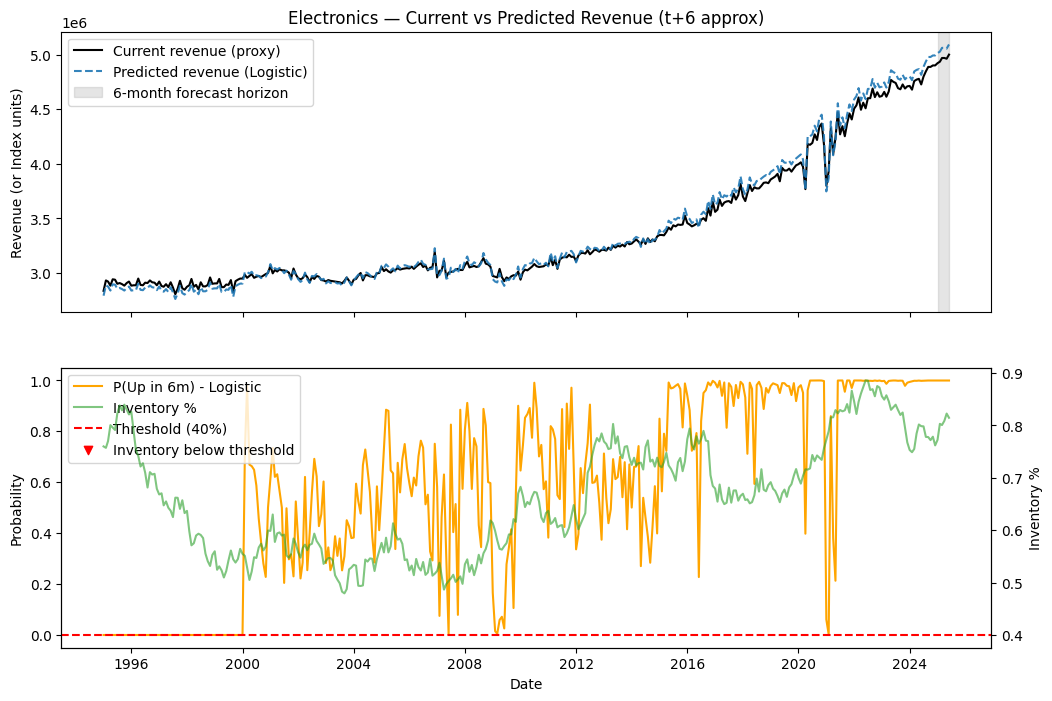


=== Sector: Groceries ===
hist forward-6 means: pos=2.19%  neg=-1.40%


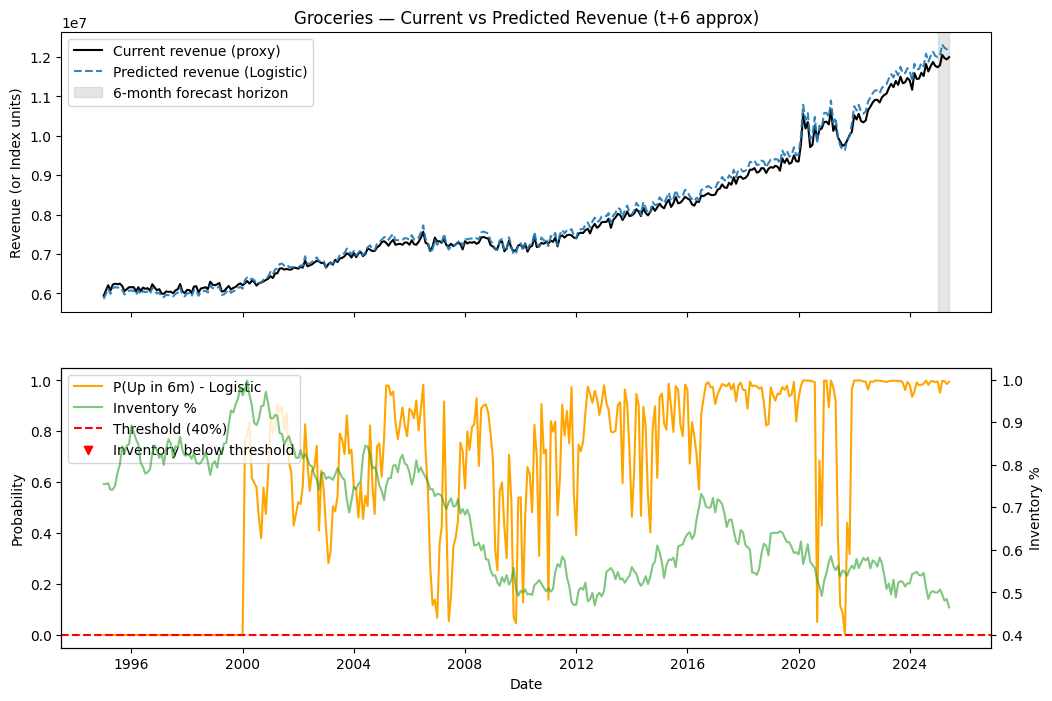


=== Sector: Textiles ===
hist forward-6 means: pos=11.34%  neg=-6.03%


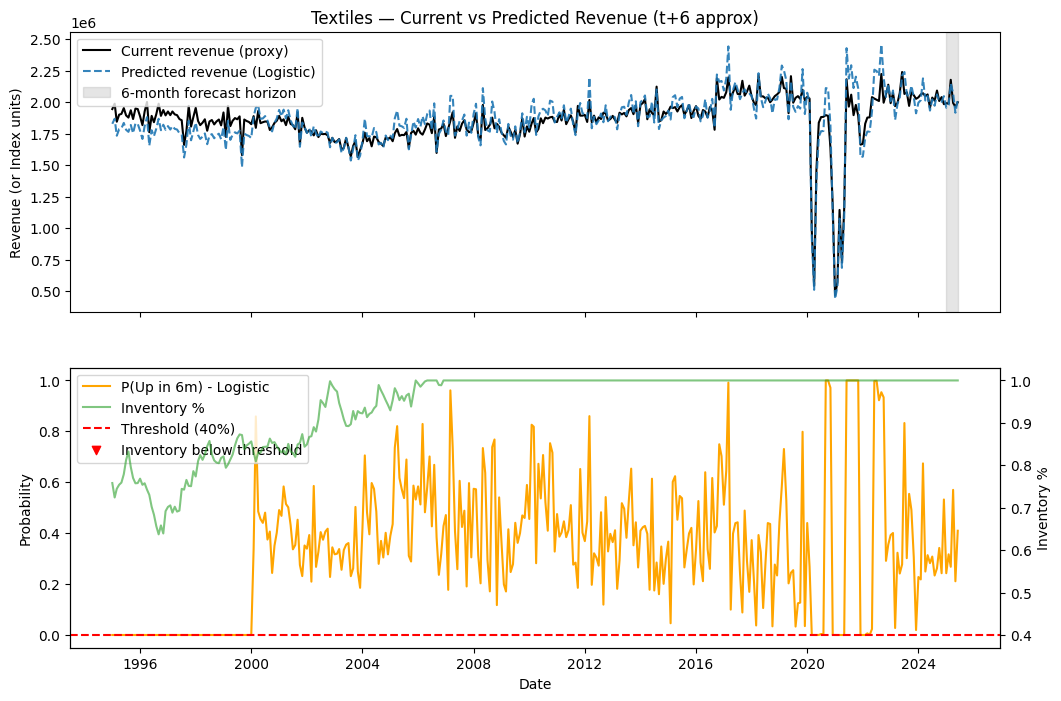


=== Sector: Furniture ===
hist forward-6 means: pos=3.99%  neg=-2.98%


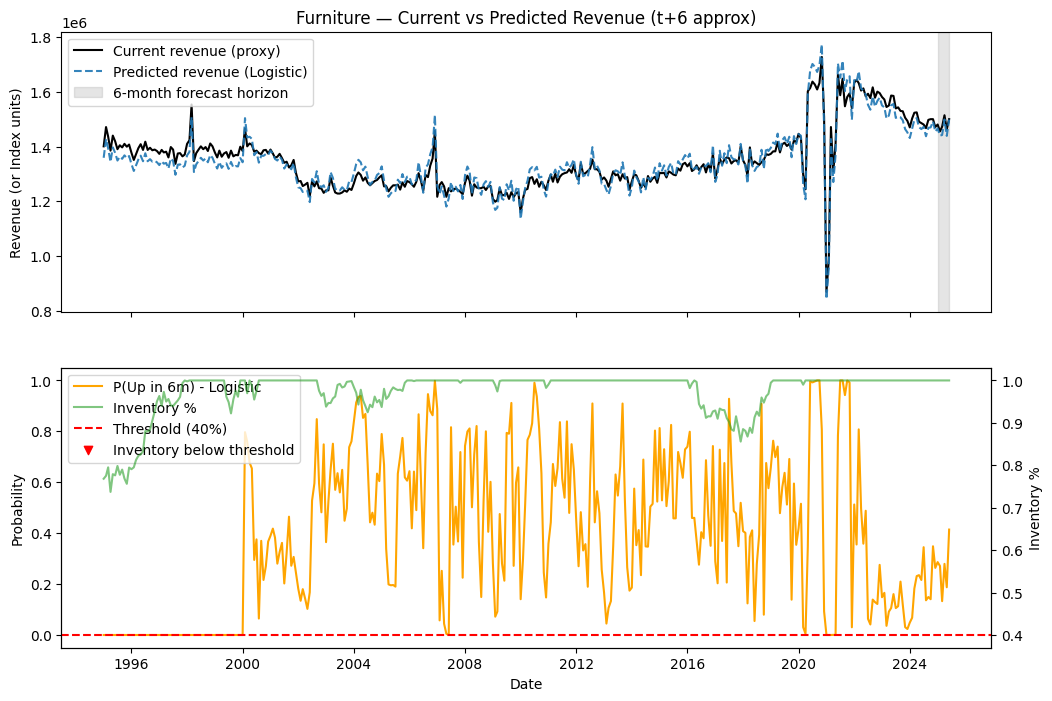


=== Sector: Pharmacy ===
hist forward-6 means: pos=3.03%  neg=-1.68%


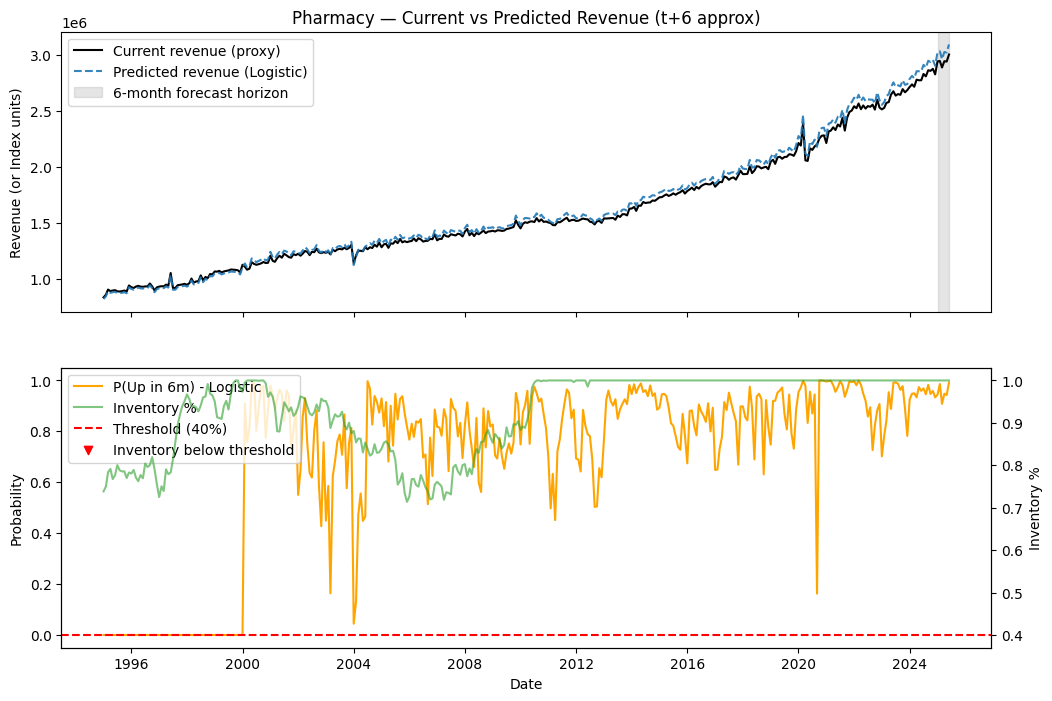


=== Sector: Motor Vehicles ===
hist forward-6 means: pos=4.55%  neg=-4.53%


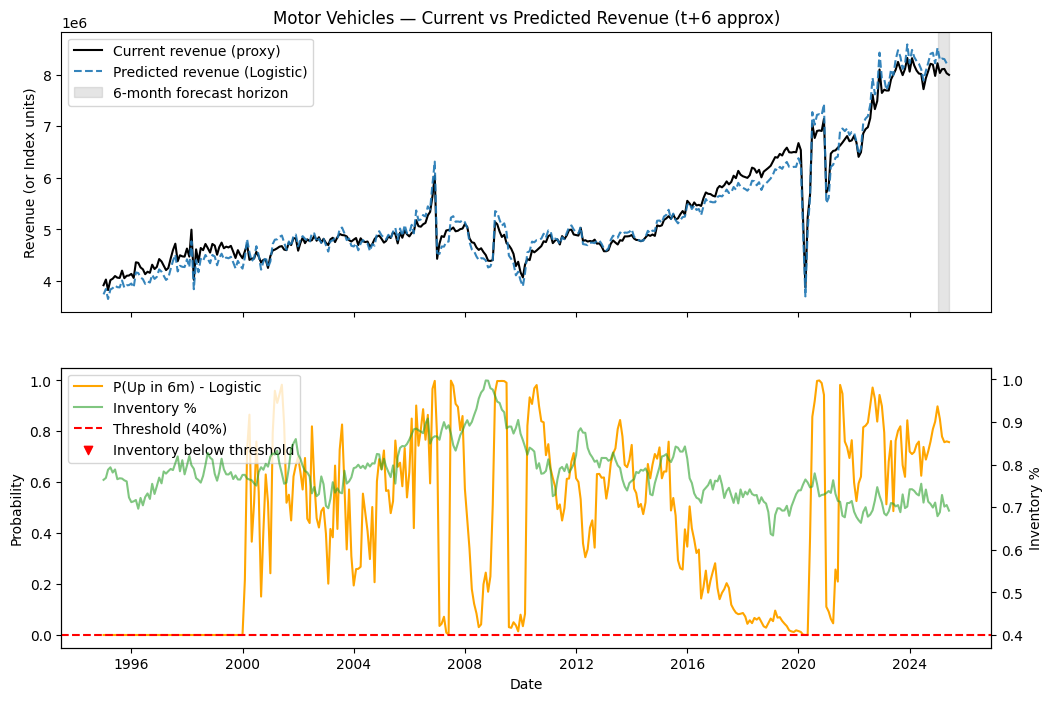

Sector       Date  Current_Index  Current_RevenueProxy   P_up_lr  \
0     Electronics 2024-12-01          143.7          4.901091e+06  0.999943   
1       Groceries 2024-12-01          142.1          1.177624e+07  0.992886   
2        Textiles 2024-12-01          102.5          1.984511e+06  0.532382   
3       Furniture 2024-12-01          112.6          1.471254e+06  0.263572   
4        Pharmacy 2024-12-01          160.9          2.822807e+06  0.933530   
5  Motor Vehicles 2024-12-01          152.4          7.979058e+06  0.838155   

   Expected_fwd6_pct_lr  Pred_Revenue_lr  Inventory_pct  Restock_multiplier  \
0              1.863898     4.992443e+06       0.761905                 1.0   
1              2.161341     1.203077e+07       0.499562                 1.0   
2              3.219956     2.048412e+06       1.000000                 1.0   
3             -1.144328     1.454418e+06       1.000000                 1.0   
4              2.717290     2.899511e+06       1.000000                 1.0   
5              3.082179     8.224986e+06       0.710877                 1.0   

   Rec_pct_lr  Rec_val_lr  
0    1.863898         0.0  
1    2.161341         0.0  
2    3.219956         0.0  
3   -1.144328         0.0  
4    2.717290         0.0  
5    3.082179         0.0

In [6]:
# Use Logistic-only business-metric conversion cell
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler

# ---------- Optional inputs you can set ----------
base_revenue_latest = {
    "Electronics": 5_000_000,
    "Groceries": 12_000_000,
    "Textiles": 2_000_000,
    "Furniture": 1_500_000,
    "Pharmacy": 3_000_000,
    "Motor Vehicles": 8_000_000,
    #"Non-market retail": 500_000
}

# Simulated inventory % series (smooth random walk clipped to [0.2,1.0])
import numpy as np, pandas as pd
np.random.seed(42)
inventory_pct = {}
for s in sectors:
    n = len(dataset.index)
    rw = np.cumsum(np.random.randn(n) * 0.02) + 0.75
    inv_series = pd.Series(np.clip(rw, 0.2, 1.0), index=dataset.index)
    inventory_pct[s] = inv_series

# On-hand inventory value: assume 1.5 months coverage of base revenue
onhand_inventory_value = {s: 1.5 * base_revenue_latest[s] for s in base_revenue_latest}

# Map sector -> monetary revenue corresponding to latest index value (optional)
# e.g. base_revenue_latest = {"Electronics": 5_000_000, "Groceries": 10_000_000, ...}
# base_revenue_latest = None

# inventory_pct: optional map sector -> pd.Series of inventory coverage (0..1), indexed by dataset.index
# e.g. inventory_pct = {"Electronics": pd.Series(..., index=dataset.index), ...}
# inventory_pct = None

# on-hand inventory value by sector (monetary), optional
# onhand_inventory_value = None

# thresholds / tuning
inventory_threshold = 0.40   # below this fraction triggers shortage amplification
shortage_alpha = 1.0         # how strongly shortage increases the restock multiplier

# ---------- helper function ----------
def compute_forward6_stats(series):
    """
    Compute forward-6-month percent change series: (x[t+6] - x[t]) / x[t] * 100.
    Return (mean_positive_pct, mean_negative_pct, full_forward_series).
    Used to convert P(up) -> expected magnitude using conditional historical averages.
    """
    fwd6 = (series.shift(-6) - series) / series * 100.0
    pos_mean = fwd6[fwd6 > 0].mean()
    neg_mean = fwd6[fwd6 < 0].mean()
    # fallback if no positive/negative samples
    if pd.isna(pos_mean):
        pos_mean = fwd6.mean() if not pd.isna(fwd6.mean()) else 0.0
    if pd.isna(neg_mean):
        neg_mean = fwd6.mean() if not pd.isna(fwd6.mean()) else 0.0
    return pos_mean, neg_mean, fwd6

# ---------- containers ----------
sectors = [c for c in data.columns]
summary_rows = []

# loop sectors
for sector in sectors:
    print(f"\n=== Sector: {sector} ===")
    idx = dataset.index                      # time index aligned with features/targets
    index_series = data[sector].reindex(idx) # Bundesbank index aligned to dataset rows
    index_values = index_series.values       # numpy view for fast arithmetic

    # 1) historical forward stats (use full raw series to estimate conditional magnitudes)
    mean_pos_fwd6, mean_neg_fwd6, hist_fwd6 = compute_forward6_stats(data[sector])
    print(f"hist forward-6 means: pos={mean_pos_fwd6:.2f}%  neg={mean_neg_fwd6:.2f}%")

    # 2) prepare features & target for Logistic Regression (Month one-hot + scale numeric)
    X = dataset[[col for col in dataset.columns if col.startswith(sector) and not col.endswith("_target")] + ["Month"]].copy()
    y = dataset[f"{sector}_target"].copy()
    # month one-hot (for LR)
    month_ohe = pd.get_dummies(X["Month"].astype(int), prefix="Month")
    X_lr = pd.concat([X.drop(columns=["Month"]), month_ohe], axis=1)
    numeric_cols = X_lr.columns.difference(month_ohe.columns)
    scaler = StandardScaler()
    X_lr[numeric_cols] = scaler.fit_transform(X_lr[numeric_cols])

    # 3) TimeSeriesSplit 5-fold to produce out-of-fold probabilities
    tscv = TimeSeriesSplit(n_splits=5)
    prob_all_lr = np.zeros(len(y))  # will store out-of-fold P(up)
    for train_idx, test_idx in tscv.split(X_lr):
        X_train, X_test = X_lr.iloc[train_idx], X_lr.iloc[test_idx]
        y_train = y.iloc[train_idx]

        lr = LogisticRegression(max_iter=1000, solver="liblinear", penalty="l1", C=1.0, random_state=42)
        lr.fit(X_train, y_train)
        prob_all_lr[test_idx] = lr.predict_proba(X_test)[:, 1]

    # 4) convert probability -> expected forward-6% using conditional historical magnitudes
    p = prob_all_lr  # P(Up in 6m)
    exp_fwd6_pct = p * mean_pos_fwd6 + (1.0 - p) * mean_neg_fwd6  # expected % change

    # 5) predicted index at t+6 approx = current_index * (1 + expected_pct/100)
    pred_idx_lr = index_values * (1.0 + exp_fwd6_pct / 100.0)

    # 6) convert index -> revenue units if base_revenue_latest provided, else keep index units
    last_index = data[sector].iloc[-1]
    if base_revenue_latest and sector in base_revenue_latest:
        base_rev = base_revenue_latest[sector]
        revenue_now = (index_values / last_index) * base_rev
        revenue_pred_lr = (pred_idx_lr / last_index) * base_rev
    else:
        revenue_now = index_values
        revenue_pred_lr = pred_idx_lr

    # 7) inventory series (if provided) else assume fully stocked
    if inventory_pct and sector in inventory_pct:
        inv = inventory_pct[sector].reindex(idx).fillna(1.0).values
    else:
        inv = np.ones(len(idx))

    # 8) compute shortage ratio and restock multiplier
    shortage = np.maximum(0.0, (inventory_threshold - inv) / inventory_threshold)
    restock_mult = 1.0 + shortage_alpha * shortage

    # 9) recommended percent order change (positive => increase orders, negative => decrease)
    rec_pct_lr = exp_fwd6_pct * restock_mult

    # 10) recommended order monetary value if on-hand inventory provided
    rec_val_lr = None
    if onhand_inventory_value and sector in onhand_inventory_value:
        onhand_val = onhand_inventory_value[sector]
        rec_val_lr = np.maximum(0.0, revenue_pred_lr - onhand_val)

    # 11) store summary for the latest usable row (avoid last 6 rows which lack t+6)
    last_ok = len(idx) - 7 if len(idx) >= 8 else -1
    summary = {
        "Sector": sector,
        "Date": idx[last_ok],
        "Current_Index": float(index_values[last_ok]),
        "Current_RevenueProxy": float(revenue_now[last_ok]),
        "P_up_lr": float(p[last_ok]),
        "Expected_fwd6_pct_lr": float(exp_fwd6_pct[last_ok]),
        "Pred_Revenue_lr": float(revenue_pred_lr[last_ok]) if not np.isnan(revenue_pred_lr[last_ok]) else None,
        "Inventory_pct": float(inv[last_ok]),
        "Restock_multiplier": float(restock_mult[last_ok]),
        "Rec_pct_lr": float(rec_pct_lr[last_ok]),
    }
    if rec_val_lr is not None:
        summary["Rec_val_lr"] = float(rec_val_lr[last_ok])
    summary_rows.append(summary)

    # 12) Plot: revenue proxy and predicted revenue series + logistic probability and inventory
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

    # revenue (or index) lines
    ax1.plot(idx, revenue_now, label="Current revenue (proxy)", color="black", lw=1.5)
    ax1.plot(idx, revenue_pred_lr, label="Predicted revenue (Logistic)", linestyle="--", alpha=0.9)
    ax1.set_ylabel("Revenue (or Index units)")
    ax1.set_title(f"{sector} — Current vs Predicted Revenue (t+6 approx)")
    ax1.legend(loc="upper left")

    # --------------------------
    # HIGHLIGHT 6-MONTH FORECAST HORIZON
    # --------------------------
    # The last 6 months are where the model does not have forward t+6 actual values
    forecast_start_idx = len(idx) - 6
    if forecast_start_idx < len(idx):
        ax1.axvspan(idx[forecast_start_idx], idx[-1], color="gray", alpha=0.2, label="6-month forecast horizon")
        ax1.legend(loc="upper left")

    # probability + inventory on second subplot
    ax2.plot(idx, p, label="P(Up in 6m) - Logistic", color="orange")
    ax2.set_ylabel("Probability")
    ax2.set_xlabel("Date")

    # show inventory on twin axis of second subplot
    ax2b = ax2.twinx()
    ax2b.plot(idx, inv, label="Inventory %", color="tab:green", alpha=0.6)
    ax2b.axhline(inventory_threshold, color="red", linestyle="--", label=f"Threshold ({inventory_threshold*100:.0f}%)")
    # mark shortage points visually
    shortage_mask = inv < inventory_threshold
    ax2b.scatter(idx[shortage_mask], inv[shortage_mask], color="red", marker="v", zorder=10, label="Inventory below threshold")
    ax2b.set_ylabel("Inventory %")

    # legends
    lines1, labels1 = ax2.get_legend_handles_labels()
    lines2, labels2 = ax2b.get_legend_handles_labels()
    ax2.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

    plt.show()

# 13) display compact summary table
summary_df = pd.DataFrame(summary_rows)
display(summary_df)



14:28:42 - cmdstanpy - INFO - Chain [1] start processing
14:28:42 - cmdstanpy - INFO - Chain [1] done processing



==== Electronics ====
Training feature sample: ['Electronics_t-12', 'Electronics_YoY', 'Electronics_MoM', 'Electronics_vol_12m', 'Electronics_CumGrowth_6m', 'Electronics_RollMax_6m', 'Electronics_RollMin_6m']
Trained LR on 366 rows


/tmp/ipykernel_2949/4146316799.py:96: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_df.fillna(method="ffill", inplace=True)
/tmp/ipykernel_2949/4146316799.py:97: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_df.fillna(method="bfill", inplace=True)


prophet_base   p_up_lr  exp_fwd6_pct  pred_index_tplus6
date                                                               
2025-07-01    147.625041  0.907889      1.548739         149.911367
2025-08-01    148.151941  0.919304      1.587821         150.504328
2025-09-01    148.544003  0.896086      1.508331         150.784539
2025-10-01    149.248202  0.910284      1.556938         151.571904
2025-11-01    149.813778  0.929987      1.624394         152.247344
2025-12-01    150.189636  0.924609      1.605983         152.601656

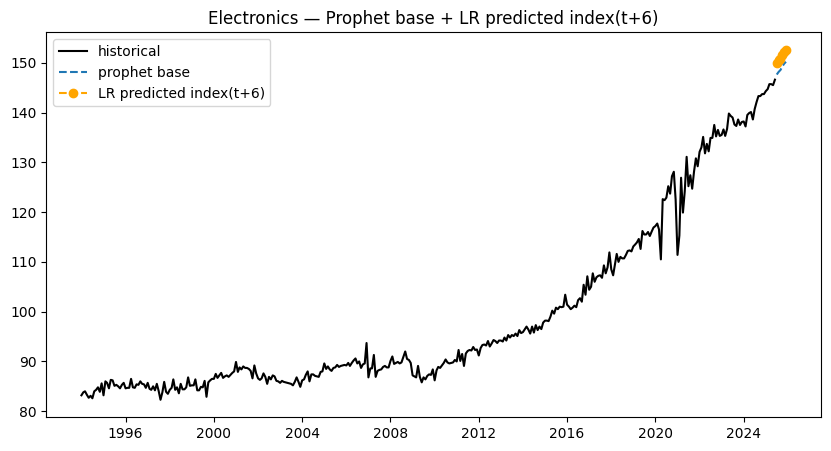

14:28:42 - cmdstanpy - INFO - Chain [1] start processing
14:28:42 - cmdstanpy - INFO - Chain [1] done processing



==== Groceries ====
Training feature sample: ['Groceries_t-12', 'Groceries_YoY', 'Groceries_MoM', 'Groceries_vol_12m', 'Groceries_CumGrowth_6m', 'Groceries_RollMax_6m', 'Groceries_RollMin_6m']
Trained LR on 366 rows


/tmp/ipykernel_2949/4146316799.py:96: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_df.fillna(method="ffill", inplace=True)
/tmp/ipykernel_2949/4146316799.py:97: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_df.fillna(method="bfill", inplace=True)


prophet_base   p_up_lr  exp_fwd6_pct  pred_index_tplus6
date                                                               
2025-07-01    144.987768  0.952346      2.015879         147.910546
2025-08-01    145.811224  0.959743      2.042420         148.789302
2025-09-01    145.849709  0.917079      1.889333         148.605296
2025-10-01    146.367647  0.934764      1.952791         149.225901
2025-11-01    146.911976  0.943457      1.983981         149.826683
2025-12-01    147.247035  0.952149      2.015171         150.214314

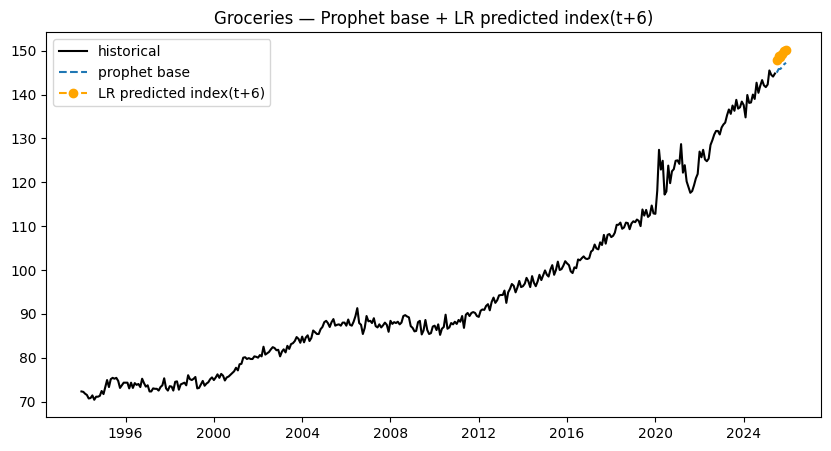

14:28:42 - cmdstanpy - INFO - Chain [1] start processing
14:28:42 - cmdstanpy - INFO - Chain [1] done processing



==== Textiles ====
Training feature sample: ['Textiles_t-12', 'Textiles_YoY', 'Textiles_MoM', 'Textiles_vol_12m', 'Textiles_CumGrowth_6m', 'Textiles_RollMax_6m', 'Textiles_RollMin_6m']
Trained LR on 366 rows


/tmp/ipykernel_2949/4146316799.py:96: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_df.fillna(method="ffill", inplace=True)
/tmp/ipykernel_2949/4146316799.py:97: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_df.fillna(method="bfill", inplace=True)


prophet_base   p_up_lr  exp_fwd6_pct  pred_index_tplus6
date                                                               
2025-07-01    102.649612  0.373687      0.463160         103.125043
2025-08-01    103.034777  0.375664      0.497503         103.547378
2025-09-01    102.459420  0.118269     -3.973862          98.387823
2025-10-01    103.805385  0.314427     -0.566277         103.217559
2025-11-01    102.977908  0.310559     -0.633468         102.325576
2025-12-01    101.885178  0.275003     -1.251135         100.610457

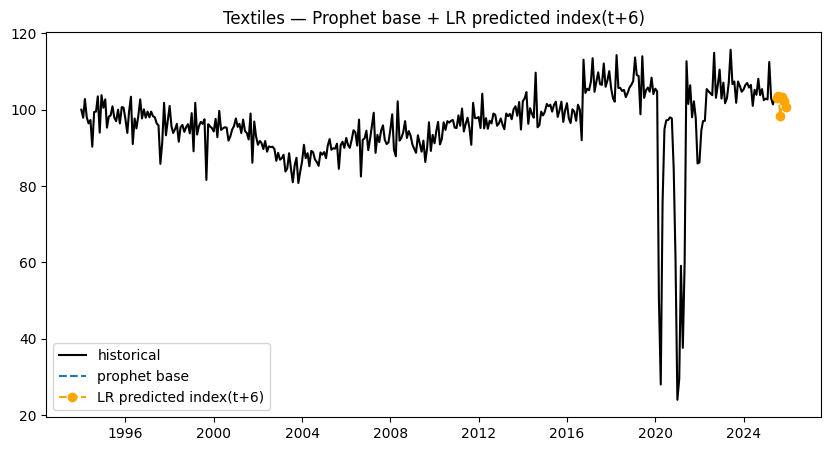

14:28:43 - cmdstanpy - INFO - Chain [1] start processing
14:28:43 - cmdstanpy - INFO - Chain [1] done processing



==== Furniture ====
Training feature sample: ['Furniture_t-12', 'Furniture_YoY', 'Furniture_MoM', 'Furniture_vol_12m', 'Furniture_CumGrowth_6m', 'Furniture_RollMax_6m', 'Furniture_RollMin_6m']
Trained LR on 366 rows


/tmp/ipykernel_2949/4146316799.py:96: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_df.fillna(method="ffill", inplace=True)
/tmp/ipykernel_2949/4146316799.py:97: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_df.fillna(method="bfill", inplace=True)


prophet_base   p_up_lr  exp_fwd6_pct  pred_index_tplus6
date                                                               
2025-07-01    120.881512  0.518240      0.630089         121.643174
2025-08-01    120.992414  0.694581      1.858763         123.241375
2025-09-01    121.049707  0.649122      1.542018         122.916316
2025-10-01    121.711572  0.388054     -0.276993         121.374439
2025-11-01    122.771196  0.696100      1.869346         125.066215
2025-12-01    122.421069  0.645389      1.516009         124.276984

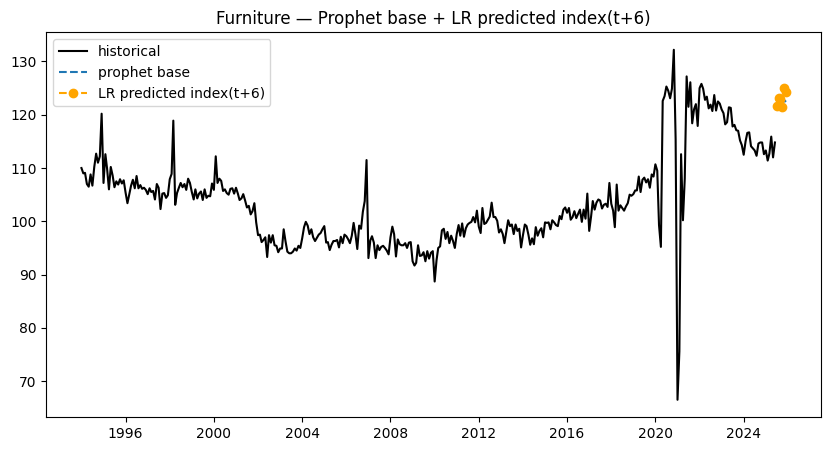

14:28:43 - cmdstanpy - INFO - Chain [1] start processing
14:28:43 - cmdstanpy - INFO - Chain [1] done processing



==== Pharmacy ====
Training feature sample: ['Pharmacy_t-12', 'Pharmacy_YoY', 'Pharmacy_MoM', 'Pharmacy_vol_12m', 'Pharmacy_CumGrowth_6m', 'Pharmacy_RollMax_6m', 'Pharmacy_RollMin_6m']
Trained LR on 366 rows


/tmp/ipykernel_2949/4146316799.py:96: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_df.fillna(method="ffill", inplace=True)
/tmp/ipykernel_2949/4146316799.py:97: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_df.fillna(method="bfill", inplace=True)


prophet_base   p_up_lr  exp_fwd6_pct  pred_index_tplus6
date                                                               
2025-07-01    167.937339  0.731669      1.765564         170.902380
2025-08-01    168.515475  0.672228      1.485315         171.018460
2025-09-01    169.186588  0.890839      2.516009         173.443338
2025-10-01    169.806230  0.763891      1.917486         173.062240
2025-11-01    170.652573  0.818310      2.174055         174.362654
2025-12-01    171.241775  0.604031      1.163783         173.234658

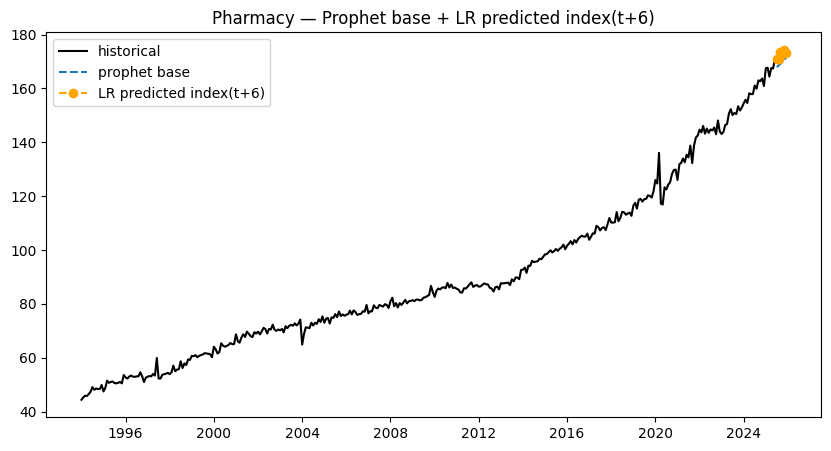

14:28:43 - cmdstanpy - INFO - Chain [1] start processing
14:28:43 - cmdstanpy - INFO - Chain [1] done processing



==== Motor Vehicles ====
Training feature sample: ['Motor Vehicles_t-12', 'Motor Vehicles_YoY', 'Motor Vehicles_MoM', 'Motor Vehicles_vol_12m', 'Motor Vehicles_CumGrowth_6m', 'Motor Vehicles_RollMax_6m', 'Motor Vehicles_RollMin_6m']
Trained LR on 366 rows


/tmp/ipykernel_2949/4146316799.py:96: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_df.fillna(method="ffill", inplace=True)
/tmp/ipykernel_2949/4146316799.py:97: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_df.fillna(method="bfill", inplace=True)


prophet_base   p_up_lr  exp_fwd6_pct  pred_index_tplus6
date                                                               
2025-07-01    158.380358  0.627285      1.166041         160.227139
2025-08-01    158.885453  0.698631      1.814348         161.768188
2025-09-01    159.697594  0.625720      1.151818         161.537020
2025-10-01    160.352590  0.658167      1.446655         162.672339
2025-11-01    160.801343  0.751333      2.293243         164.488909
2025-12-01    161.735935  0.754132      2.318674         165.486063

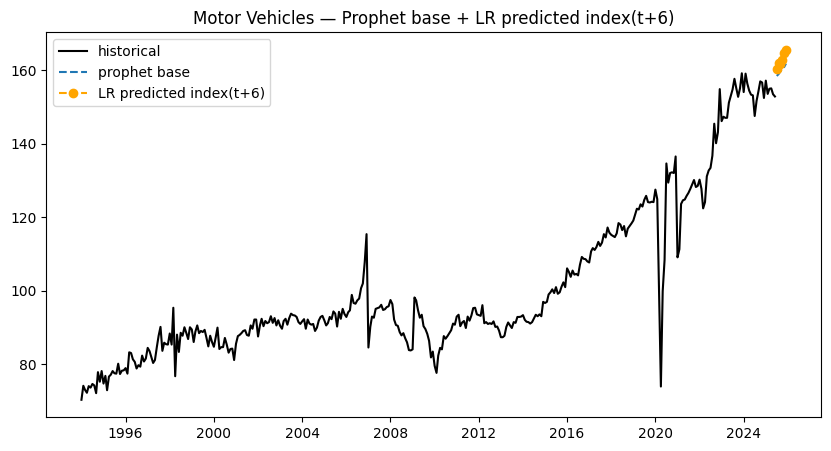

Done — first rows of combined future_results_df:


Sector       Date  prophet_base   p_up_lr  exp_fwd6_pct  \
0  Electronics 2025-07-01    147.625041  0.907889      1.548739   
1  Electronics 2025-08-01    148.151941  0.919304      1.587821   
2  Electronics 2025-09-01    148.544003  0.896086      1.508331   
3  Electronics 2025-10-01    149.248202  0.910284      1.556938   
4  Electronics 2025-11-01    149.813778  0.929987      1.624394   

   pred_index_tplus6  
0         149.911367  
1         150.504328  
2         150.784539  
3         151.571904  
4         152.247344

In [16]:
# Robust end-to-end: Prophet -> compute same features on combined series -> impute -> LR predict next 6 months
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# helper (you already have earlier)
def compute_forward6_stats(series):
    fwd6 = (series.shift(-6) - series) / series * 100.0
    pos_mean = fwd6[fwd6 > 0].mean()
    neg_mean = fwd6[fwd6 < 0].mean()
    if pd.isna(pos_mean):
        pos_mean = fwd6.mean() if not pd.isna(fwd6.mean()) else 0.0
    if pd.isna(neg_mean):
        neg_mean = fwd6.mean() if not pd.isna(fwd6.mean()) else 0.0
    return pos_mean, neg_mean, fwd6

H = 6   # months ahead to forecast
sector_list = [c for c in data.columns]
all_future_results = []

for sector in sector_list:
    print("\n====", sector, "====")

    # --- training feature names that were used earlier in your pipeline ---
    train_feature_cols = [c for c in dataset.columns if c.startswith(sector) and not c.endswith("_target")]
    print("Training feature sample:", train_feature_cols[:8])

    # --- build training X and y (drop rows with NaNs in these feature cols) ---
    X_train_base = dataset[train_feature_cols + ["Month"]].copy()
    y_train = dataset[f"{sector}_target"].astype(int).copy()

    # drop rows with NaNs in training features (ensures scaler.fit and LR.fit work)
    valid_train_idx = X_train_base.dropna().index
    X_train_base = X_train_base.loc[valid_train_idx]
    y_train = y_train.loc[valid_train_idx]

    # build explicit Month_1..Month_12 dummies for training consistency
    month_dummies_train = pd.get_dummies(X_train_base["Month"].astype(int), prefix="Month")
    for m in range(1,13):
        colname = f"Month_{m}"
        if colname not in month_dummies_train.columns:
            month_dummies_train[colname] = 0
    month_dummies_train = month_dummies_train[[f"Month_{m}" for m in range(1,13)]]

    X_lr_train = pd.concat([X_train_base.drop(columns=["Month"]), month_dummies_train], axis=1)

    # numeric columns to scale (everything except the Month_* dummies)
    numeric_cols = [c for c in X_lr_train.columns if not c.startswith("Month_")]

    # fit scaler on training numeric cols
    scaler = StandardScaler()
    if numeric_cols:
        X_lr_train[numeric_cols] = scaler.fit_transform(X_lr_train[numeric_cols])

    # fit final logistic regression on full (cleaned) training rows
    lr_final = LogisticRegression(max_iter=2000, solver="liblinear", penalty="l1", C=1.0, random_state=42)
    lr_final.fit(X_lr_train, y_train)
    print("Trained LR on", len(X_lr_train), "rows")

    # --- fit Prophet and produce H-month forecast ---
    dfp = data[[sector]].reset_index().rename(columns={"Date":"ds", sector:"y"})
    m = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
    m.fit(dfp)
    future = m.make_future_dataframe(periods=H, freq="MS")
    fc = m.predict(future)

    # produce prophet future series (only future dates)
    last_hist = data.index.max()
    future_dates = pd.date_range(start=last_hist + pd.offsets.MonthBegin(1), periods=H, freq="MS")
    prophet_future = fc.set_index("ds")["yhat"].reindex(future_dates)

    # --- combine history + prophet future into one continuous series so lags work ---
    combined_series = pd.concat([data[sector], prophet_future]).sort_index()
    combined_series = combined_series[~combined_series.index.duplicated(keep='first')]  # safety
    combined_df = pd.DataFrame({"value": combined_series})

    # --- compute the exact features used in training, on combined_df ---
    # (these names match the ones in your earlier pipeline)
    combined_df[f"{sector}_t-12"] = combined_df["value"].shift(12)
    combined_df[f"{sector}_YoY"] = combined_df["value"].pct_change(12) * 100.0
    combined_df[f"{sector}_MoM"] = combined_df["value"].pct_change(1) * 100.0
    combined_df[f"{sector}_vol_12m"] = combined_df["value"].pct_change(1).rolling(12).std()
    combined_df[f"{sector}_CumGrowth_6m"] = ((combined_df["value"].pct_change(1) + 1).rolling(6).apply(lambda x: x.prod() - 1, raw=False)) * 100.0
    combined_df[f"{sector}_RollMax_6m"] = combined_df["value"].rolling(6).max()
    combined_df[f"{sector}_RollMin_6m"] = combined_df["value"].rolling(6).min()

    combined_df["Month"] = combined_df.index.month

    # --- Replace inf with NaN, then fill NaNs robustly so LR gets no missing values ---
    combined_df.replace([np.inf, -np.inf], np.nan, inplace=True)

    # forward-fill then back-fill to propagate recent values into short NaN gaps (works well because we have continuous series)
    combined_df.fillna(method="ffill", inplace=True)
    combined_df.fillna(method="bfill", inplace=True)

    # still may have NaNs (e.g. at very start if history shorter than rolling window). Fill remaining numeric NaNs with medians
    numeric_all = combined_df.select_dtypes(include=[np.number]).columns.tolist()
    medians = combined_df[numeric_all].median()
    combined_df[numeric_all] = combined_df[numeric_all].fillna(medians)

    # --- slice future feature rows (exact columns matching training) ---
    # build future feature frame using the EXACT same sector-prefixed columns + Month
    future_feat_df = combined_df.loc[future_dates, [col for col in combined_df.columns if col.startswith(f"{sector}_")] + ["Month"]].copy()

    # If any training feature names are missing (rare), add them and fill with medians (or zero)
    for col in train_feature_cols:
        if col not in future_feat_df.columns:
            # add column and fill with median from combined_df if exists else 0
            if col in combined_df.columns:
                future_feat_df[col] = combined_df[col].median()
            else:
                future_feat_df[col] = 0.0

    # re-order columns to training feature order + Month
    cols_order = [c for c in train_feature_cols if c in future_feat_df.columns] + ["Month"]
    future_feat_df = future_feat_df.reindex(columns=cols_order)

    # drop any rows that still have NaNs in the required numeric columns (should be none now)
    required_numeric = [c for c in train_feature_cols if c in numeric_all]
    if future_feat_df[required_numeric].isna().any().any():
        print("Warning: some NaNs remain in required numeric future features — filling with medians")
        future_feat_df[required_numeric] = future_feat_df[required_numeric].fillna(combined_df[required_numeric].median())

    # --- Build month dummies for future and align with LR training columns ---
    month_ohe_future = pd.get_dummies(future_feat_df["Month"].astype(int), prefix="Month")
    for m in range(1,13):
        cname = f"Month_{m}"
        if cname not in month_ohe_future.columns:
            month_ohe_future[cname] = 0
    month_ohe_future = month_ohe_future[[f"Month_{m}" for m in range(1,13)]]

    X_future_lr = pd.concat([future_feat_df.drop(columns=["Month"]).reset_index(drop=True), month_ohe_future.reset_index(drop=True)], axis=1)

    # align future features to training columns; missing columns filled with 0
    X_future_lr = X_future_lr.reindex(columns=X_lr_train.columns, fill_value=0)

    # scale numeric columns present in X_future_lr using the scaler fitted on training
    num_present = [c for c in numeric_cols if c in X_future_lr.columns]
    if num_present:
        X_future_lr[num_present] = scaler.transform(X_future_lr[num_present])

    # final safety: replace any remaining NaNs with column medians (should be none)
    if X_future_lr.isna().any().any():
        print("Final safety fill: replacing remaining NaNs in X_future_lr with column medians")
        X_future_lr = X_future_lr.fillna(X_future_lr.median())

    # --- Predict probabilities with LR ---
    p_future = lr_final.predict_proba(X_future_lr)[:, 1]

    # convert p -> expected forward-6% using historical calibration
    mean_pos, mean_neg, _ = compute_forward6_stats(data[sector])
    exp_fwd6_future = p_future * mean_pos + (1 - p_future) * mean_neg

    # base values (the combined series values at future t, used as base to compute index(t+6))
    base_vals = combined_df.loc[future_feat_df.index, "value"].values
    pred_idx_tplus6 = base_vals * (1.0 + exp_fwd6_future / 100.0)

    # Save results for this sector
    df_out = pd.DataFrame({
        "date": future_feat_df.index,
        "prophet_base": base_vals,
        "p_up_lr": p_future,
        "exp_fwd6_pct": exp_fwd6_future,
        "pred_index_tplus6": pred_idx_tplus6
    }).set_index("date")

    display(df_out)
    all_future_results.append((sector, df_out))

    # plot
    plt.figure(figsize=(10,5))
    plt.plot(data[sector].index, data[sector].values, label="historical", color="black")
    plt.plot(prophet_future.index, prophet_future.values, label="prophet base", linestyle="--")
    plt.plot(df_out.index, df_out["pred_index_tplus6"], marker="o", linestyle="--", color="orange", label="LR predicted index(t+6)")
    plt.title(f"{sector} — Prophet base + LR predicted index(t+6)")
    plt.legend()
    plt.show()

# combine outputs
future_results_df = pd.concat([df for (_, df) in all_future_results], keys=[s for (s,_) in all_future_results], names=["Sector","Date"]).reset_index()
print("Done — first rows of combined future_results_df:")
display(future_results_df.head())

In [ ]:
#################################################################
### Step 8: XGBoost Training #####################################
#################################################################

import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
#import shap # Need to install this!!!

# Define sectors
sectors = [c for c in data.columns]

# Hyperparameters
xgb_params = {
    "n_estimators": 200,
    "max_depth": 3,
    "learning_rate": 0.1,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "random_state": 42,
    "eval_metric": "logloss",
    "enable_categorical": True
}

# Loop through sectors
for sector in sectors:
    print(f"=== Training XGBoost for {sector} ===")
    
    # Features and target
    X = dataset[[col for col in dataset.columns if col.startswith(sector) and not col.endswith("_target")] + ["Month"]]
    y = dataset[f"{sector}_target"]
    
    # TimeSeriesSplit
    tscv = TimeSeriesSplit(n_splits=5)
    
    fold = 1
    acc_scores, auc_scores, precision_scores, recall_scores, f1_scores = [], [], [], [], []
    
    for train_idx, test_idx in tscv.split(X):
           X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
           y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

           # Train
           model = xgb.XGBClassifier(**xgb_params)
           model.fit(X_train, y_train)

           # Predict
           y_pred = model.predict(X_test)
           y_prob = model.predict_proba(X_test)[:,1]

           # Metrics
           acc = accuracy_score(y_test, y_pred)
           auc = roc_auc_score(y_test, y_prob)
           #precision = precision_score(y_test, y_pred)
           #recall = recall_score(y_test, y_pred)
           #f1 = f1_score(y_test, y_pred)
           #cm = confusion_matrix(y_test, y_pred)
           acc_scores.append(acc)
           auc_scores.append(auc)
           #precision_scores.append(precision)
           #recall_scores.append(recall)
           #f1_scores.append(f1_scores)

           # Periods
           train_period = f"{X_train.index.min().date()} to {X_train.index.max().date()}"
           test_period = f"{X_test.index.min().date()} to {X_test.index.max().date()}"

           print(f"Fold {fold}: Train={train_period}, Test={test_period}")
           print(f"Accuracy={acc:.3f}, ROC-AUC={auc:.3f}")
           fold +=1  
           #print(f"Accuracy={acc:.3f}, ROC-AUC={auc:.3f}, Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}")
           #print(f"Confusion Matrix:\n{cm}\n")
        
    print(f"Average Accuracy: {sum(acc_scores)/len(acc_scores):.3f}")
    print(f"Average ROC-AUC: {sum(auc_scores)/len(auc_scores):.3f}")
    #print(f"Average Precision: {sum(precision_scores)/len(precision_scores):.3f}")
    #print(f"Average Recall: {sum(recall_scores)/len(recall_scores):.3f}")
    #print(f"Average F1-score: {np.mean(f1_scores):.3f}")
    
    # Feature importance
    plt.figure(figsize=(10,6))
    xgb.plot_importance(model, importance_type='gain', max_num_features=10)
    plt.title(f"Top Feature Importances - {sector}")
    plt.show()
    


In [ ]:
#################################################################
### Step 9: Random Forest Training #############################
#################################################################

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Define sectors
sectors = [c for c in data.columns]

# Hyperparameters for Random Forest
rf_params = {
    "n_estimators": 300,     # Number of trees in the forest
    "max_depth": None,       # Let trees grow until all leaves are pure or min_samples split reached
    "max_features": "sqrt",  # Random subset of features at each split → decorrelation
    "min_samples_split": 5,  # Regularization → prevent too small splits
    "min_samples_leaf": 2,   # Avoid leaves with only 1 observation
    "bootstrap": True,       # Bootstrap sampling for diversity
    "random_state": 42,
    "n_jobs": -1             # Use all CPUs for training
}

# Loop through sectors
for sector in sectors:
    print(f"=== Training Random Forest for {sector} ===")
    
    # Features and target
    X = dataset[[col for col in dataset.columns if col.startswith(sector) and not col.endswith("_target")] + ["Month"]]
    y = dataset[f"{sector}_target"]
    
    # TimeSeriesSplit
    tscv = TimeSeriesSplit(n_splits=5)
    
    fold = 1
    acc_scores, auc_scores = [], []
    
    for train_idx, test_idx in tscv.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Train Random Forest
        rf_model = RandomForestClassifier(**rf_params)
        rf_model.fit(X_train, y_train)

        # Predict
        y_pred = rf_model.predict(X_test)
        y_prob = rf_model.predict_proba(X_test)[:, 1]

        # Metrics
        acc = accuracy_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)
        
        acc_scores.append(acc)
        auc_scores.append(auc)

        # Period info
        train_period = f"{X_train.index.min().date()} to {X_train.index.max().date()}"
        test_period = f"{X_test.index.min().date()} to {X_test.index.max().date()}"
        print(f"Fold {fold}: Train={train_period}, Test={test_period}")
        print(f"Accuracy={acc:.3f}, ROC-AUC={auc:.3f}")
        fold += 1
    
    print(f"Average Accuracy: {np.mean(acc_scores):.3f}")
    print(f"Average ROC-AUC: {np.mean(auc_scores):.3f}")
    
    # Feature importance (Gini importance)
    importances = rf_model.feature_importances_
    indices = np.argsort(importances)[::-1][:10]  # Top 10 features
    
    plt.figure(figsize=(10,6))
    plt.barh(range(len(indices)), importances[indices], align="center")
    plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
    plt.gca().invert_yaxis()
    plt.title(f"Top Random Forest Feature Importances - {sector}")
    plt.show()


In [ ]:
#################################################################
### Step 10: Logistic Regression #####################################
#################################################################

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sectors = [c for c in data.columns]

# Dictionary to store directional signals per sector
sector_signals = {}

for sector in sectors:
    print(f"=== Training Logistic Regression for {sector} ===")
    
    # Features & target
    X = dataset[[col for col in dataset.columns if col.startswith(sector) and not col.endswith("_target")]]
    y = dataset[f"{sector}_target"]
    
    # One-hot encoding for the categorical Month feature
    month_ohe = pd.get_dummies(dataset["Month"], prefix="Month")
    X = pd.concat([X, month_ohe], axis=1)
    
    # Standardize numerical features
    numeric_cols = X.columns.difference(month_ohe.columns)
    scaler = StandardScaler()
    X[numeric_cols] = scaler.fit_transform(X[numeric_cols])
    
    # TimeSeriesSplit
    tscv = TimeSeriesSplit(n_splits=5)
    
    fold = 1
    acc_scores, auc_scores, precision_scores, recall_scores, f1_scores = [], [], [], [], []
    
    # For storing predicted probabilities across folds
    prob_all = np.zeros(len(y))
    
    for train_idx, test_idx in tscv.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        # Train Logistic Regression, Include L1- Lasso regulation, I guess liblinear will suffice here
        lr_model = LogisticRegression(max_iter=1000, solver='liblinear', penalty='l1', C=1.0, random_state=42)
        lr_model.fit(X_train, y_train)
        
        # Predict probabilities on test set
        y_pred = lr_model.predict(X_test)
        y_prob = lr_model.predict_proba(X_test)[:,1]
        prob_all[test_idx] = y_prob
        
        # Metrics, drop some due to run-load
        acc = accuracy_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)
        #precision = precision_score(y_test, y_pred)
        #recall = recall_score(y_test, y_pred)
        #f1 = f1_score(y_test, y_pred)
        #cm = confusion_matrix(y_test, y_pred)

        # Predicted class for metrics
        y_pred = (y_prob > 0.5).astype(int)
        
        acc_scores.append(acc)
        auc_scores.append(auc)
        #precision_scores.append(precision)
        #recall_scores.append(recall)
        #f1_scores.append(f1)
        
        # Period info, get the specific dates 
        train_period = f"{X_train.index.min().date()} to {X_train.index.max().date()}"
        test_period = f"{X_test.index.min().date()} to {X_test.index.max().date()}"
        
        print(f"Fold {fold}: Train={train_period}, Test={test_period}")
        #print(f"Accuracy={acc:.3f}, ROC-AUC={auc:.3f}, Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}")
        print(f"Accuracy={acc:.3f}, ROC-AUC={auc:.3f}")
        fold += 1
    
    print(f"Average Accuracy: {np.mean(acc_scores):.3f}")
    print(f"Average ROC-AUC: {np.mean(auc_scores):.3f}")
    #print(f"Average Precision: {np.mean(precision_scores):.3f}")
    #print(f"Average Recall: {np.mean(recall_scores):.3f}")
    #print(f"Average F1-score: {np.mean(f1_scores):.3f}")

    # ---------------------------------------------------------------------------
    # Generate directional signal, cut needs to be defined for inventory planning
    # ---------------------------------------------------------------------------
    directional_signal = (prob_all > 0.5).astype(int)
    sector_signals[sector] = directional_signal

    # -----------------------------
    # Plot predicted probability and directional signal
    # -----------------------------
    #plt.figure(figsize=(12,5))
    #plt.plot(data.index[:len(prob_all)], prob_all, label="Predicted Probability (Up 6m YoY)", color='orange')
    #plt.scatter(data.index[:len(prob_all)], directional_signal, c=directional_signal, cmap='bwr', label="Predicted Growth Direction", alpha=0.5)
    #plt.title(f"{sector}: Predicted Growth Probability & Direction")
    #plt.xlabel("Date")
    #plt.ylabel("Probability / Direction")
    #plt.legend()
    #plt.show()
    
    # Coefficients for feature importance
    coef_df = pd.DataFrame({
        "Feature": X.columns,
        "Coefficient": lr_model.coef_[0]
    }).sort_values(by="Coefficient", key=abs, ascending=False)
    
    print("Top features by absolute coefficient:")
    print(coef_df.head(10))
    
    # Plot coefficients
    plt.figure(figsize=(10,6))
    plt.barh(coef_df['Feature'][:10], coef_df['Coefficient'][:10])
    plt.title(f"Top Logistic Regression Coefficients - {sector}")
    plt.gca().invert_yaxis()
    plt.show()

In [ ]:
######################################################################################
### Step 11: Should have done this before, Testing Prophet ############################
######################################################################################
from prophet import Prophet

# Prepare data for Prophet (expects columns 'ds' and 'y')
#sector = "Electronics"
#sector = "Groceries"
#sector = "Textiles"
#sector = "Pharmacy"
#sector = "Motor Vehicles"
sector = "Furniture"
df_prophet = data[[sector]].reset_index()
df_prophet.columns = ["ds", "y"]

# Initialize and fit model
model = Prophet()
model.fit(df_prophet)

# Forecast 12 months ahead
future = model.make_future_dataframe(periods=12, freq="ME")
forecast = model.predict(future)

# Plot forecast
fig = model.plot(forecast)
#model.xlabel("Year")
#model.ylabel("Index")

forecast_df = forecast[["ds", "yhat"]].set_index("ds")

# Align with original timeline
prophet_pred = forecast_df.join(data[[sector]], how="left")

# Prophet directional signal: if forecast(t+6) > forecast(t-6) → 1, else 0
prophet_pred["Up_6m_YoY_pred"] = (
    (prophet_pred["yhat"].shift(-6) - prophet_pred["yhat"].shift(6)) / prophet_pred["yhat"].shift(6)
).apply(lambda x: 1 if x > 0 else 0)

# True target from your earlier code
true_target = dataset[f"{sector}_target"]

# Align Prophet signal with true target
comparison = pd.DataFrame({
    "True": true_target,
    "Prophet_pred": prophet_pred["Up_6m_YoY_pred"]
}).dropna()

# Metrics
from sklearn.metrics import accuracy_score, roc_auc_score

acc = accuracy_score(comparison["True"], comparison["Prophet_pred"])
auc = roc_auc_score(comparison["True"], comparison["Prophet_pred"])

print(f"Prophet Baseline for {sector}: Accuracy={acc:.3f}, ROC-AUC={auc:.3f}")

In [ ]:
#################################################################
### Step 12: Model Comparison (XGBoost vs Logistic vs Prophet) ###
#################################################################

from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt

# Dictionary to collect metrics across models and sectors
results = []

for sector in sectors:
    print(f"=== Comparing Models for {sector} ===")
    
    # -----------------
    # True target
    # -----------------
    y_true = dataset[f"{sector}_target"]
    
    # -----------------
    # Logistic Regression
    # -----------------
    lr_signal = sector_signals[sector]  # from Step 7
    lr_index = y_true.index[-len(lr_signal):]  # align with dataset
    lr_acc = accuracy_score(y_true.loc[lr_index], lr_signal)
    lr_auc = roc_auc_score(y_true.loc[lr_index], lr_signal)
    
    # -----------------
    # Prophet
    # -----------------
    df_prophet = data[[sector]].reset_index().rename(columns={"Date": "ds", sector: "y"})
    model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
    model.fit(df_prophet)
    future = model.make_future_dataframe(periods=12, freq="ME")
    forecast = model.predict(future)
    forecast_df = forecast[["ds", "yhat"]].set_index("ds")
    prophet_pred = forecast_df.join(data[[sector]], how="left")
    prophet_pred["Up_6m_YoY_pred"] = (
        (prophet_pred["yhat"].shift(-6) - prophet_pred["yhat"].shift(6)) / prophet_pred["yhat"].shift(6)
    ).apply(lambda x: 1 if x > 0 else 0)
    comp = pd.DataFrame({
        "True": y_true,
        "Prophet_pred": prophet_pred["Up_6m_YoY_pred"]
    }).dropna()
    prophet_acc = accuracy_score(comp["True"], comp["Prophet_pred"])
    prophet_auc = roc_auc_score(comp["True"], comp["Prophet_pred"])
    
    # -----------------
    # XGBoost with 5-fold TimeSeriesSplit
    # -----------------
    X = dataset[[col for col in dataset.columns if col.startswith(sector) and not col.endswith("_target")] + ["Month"]]
    y = y_true
    
    tscv = TimeSeriesSplit(n_splits=5)
    acc_scores, auc_scores = [], []
    y_pred_full = np.zeros(len(y))  # store out-of-fold predictions

    for train_idx, test_idx in tscv.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model_xgb = xgb.XGBClassifier(**xgb_params)
        model_xgb.fit(X_train, y_train)

        y_prob = model_xgb.predict_proba(X_test)[:,1]
        y_pred = (y_prob > 0.5).astype(int)
        
        y_pred_full[test_idx] = y_pred

        acc_scores.append(accuracy_score(y_test, y_pred))
        auc_scores.append(roc_auc_score(y_test, y_prob))

    # Average metrics across folds
    xgb_acc = np.mean(acc_scores)
    xgb_auc = np.mean(auc_scores)
    
    # -----------------
    # Store results
    # -----------------
    results.append({
        "Sector": sector,
        "Model": "Logistic Regression",
        "Accuracy": lr_acc,
        "ROC-AUC": lr_auc
    })
    results.append({
        "Sector": sector,
        "Model": "Prophet",
        "Accuracy": prophet_acc,
        "ROC-AUC": prophet_auc
    })
    results.append({
        "Sector": sector,
        "Model": "XGBoost",
        "Accuracy": xgb_acc,
        "ROC-AUC": xgb_auc
    })
    
    # -----------------
    # Plot comparison of directional predictions
    # -----------------
    plt.figure(figsize=(12,5))
    plt.plot(y_true.index, y_true, label="True Target", color="black", linewidth=2)
    plt.plot(lr_index, lr_signal, label="Logistic Regression", alpha=0.7)
    plt.plot(comp.index, comp["Prophet_pred"], label="Prophet", alpha=0.7)
    plt.plot(y_true.index, y_pred_full, label="XGBoost", alpha=0.7)  # <- use full OOF predictions
    plt.title(f"{sector}: Directional Growth Predictions (1 = Up, 0 = Down)")
    plt.legend()
    plt.show()

# Convert results into DataFrame
results_df = pd.DataFrame(results)

# -----------------
# Summary barplots
# -----------------
#for metric in ["Accuracy", "ROC-AUC"]:
for metric in ["Accuracy", "ROC-AUC"]:    
    plt.figure(figsize=(10,6))
    pivot = results_df.pivot(index="Sector", columns="Model", values=metric)
    pivot.plot(kind="bar", figsize=(12,6))
    plt.title(f"Model Comparison by {metric}")
    plt.ylabel(metric)
    plt.xlabel("Sector")
    plt.legend(title="Model")
    plt.xticks(rotation=45)
    plt.savefig("Model_"+ metric +"_.png",dpi=300, bbox_inches="tight")
    plt.show()

In [ ]:
#################################################################
### Step 13: Unified Model Comparison Plots ##########
#################################################################

from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score

# Define sectors
sectors = [c for c in data.columns]

# Store results for comparison
results = []

# ==============================
# 1. Random Forest Training
# ==============================
rf_params = {
    "n_estimators": 300,
    "max_depth": None,
    "max_features": "sqrt",
    "min_samples_split": 5,
    "min_samples_leaf": 2,
    "bootstrap": True,
    "random_state": 42,
    "n_jobs": -1
}

rf_signals = {}

for sector in sectors:
    print(f"=== Training Random Forest for {sector} ===")
    
    # Features and target
    X = dataset[[col for col in dataset.columns if col.startswith(sector) and not col.endswith("_target")] + ["Month"]]
    y = dataset[f"{sector}_target"]
    
    tscv = TimeSeriesSplit(n_splits=5)
    prob_all = np.zeros(len(y))  # collect out-of-sample probabilities
    
    for train_idx, test_idx in tscv.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        rf_model = RandomForestClassifier(**rf_params)
        rf_model.fit(X_train, y_train)
        
        y_prob = rf_model.predict_proba(X_test)[:,1]
        prob_all[test_idx] = y_prob
    
    # Directional signal
    rf_signal = (prob_all > 0.5).astype(int)
    rf_signals[sector] = rf_signal

# ==============================
# 2. Compare All Models
# ==============================
for sector in sectors:
    print(f"\n=== Comparing Models for {sector} ===")
    
    # True target
    y_true = dataset[f"{sector}_target"].iloc[:len(rf_signals[sector])]
    
    # Logistic Regression signal
    lr_signal = sector_signals[sector]  # from your earlier Step 7
    
    # XGBoost signal (re-train lightweight if not stored earlier)
    X = dataset[[col for col in dataset.columns if col.startswith(sector) and not col.endswith("_target")] + ["Month"]]
    y = dataset[f"{sector}_target"]
    tscv = TimeSeriesSplit(n_splits=5)
    prob_all_xgb = np.zeros(len(y))
    for train_idx, test_idx in tscv.split(X):
        model = xgb.XGBClassifier(**xgb_params)
        model.fit(X.iloc[train_idx], y.iloc[train_idx])
        prob_all_xgb[test_idx] = model.predict_proba(X.iloc[test_idx])[:,1]
    xgb_signal = (prob_all_xgb > 0.5).astype(int)

    # Prophet signal (already built in Step 8)
    prophet_signal = prophet_pred["Up_6m_YoY_pred"].loc[y_true.index].values
    
    # ===================
    # Metrics for all models
    # ===================
    model_preds = {
        "Logistic": lr_signal,
        "XGBoost": xgb_signal,
        "RandomForest": rf_signals[sector],
        "Prophet": prophet_signal
    }
    
    for model_name, pred in model_preds.items():
        acc = accuracy_score(y_true, pred)
        auc = roc_auc_score(y_true, pred)
        error_rate = 1 - acc
        
        results.append({
            "Sector": sector,
            "Model": model_name,
            "Accuracy": acc,
            "ROC-AUC": auc,
            "ErrorRate": error_rate
        })

# ==============================
# 3. Summarize Results
# ==============================
results_df = pd.DataFrame(results)

print("\n=== Model Comparison Results ===")
print(results_df.groupby(["Sector", "Model"]).mean().round(3))


In [ ]:
#################################################################
### Step 14: Model Comparison Plots by Metric ########
#################################################################

import seaborn as sns

# ==============================
# Summarize Results
# ==============================
results_df = pd.DataFrame(results)

print("\n=== Model Comparison Results ===")
print(results_df.groupby(["Sector", "Model"]).mean().round(3))

# ==============================
# Unified Plots (One per Metric)
# ==============================
metrics = ["Accuracy", "ROC-AUC", "ErrorRate"]

for metric in metrics:
    plt.figure(figsize=(12,6))
    sns.barplot(
        data=results_df,
        x="Sector",
        y=metric,
        hue="Model"
    )
    plt.title(f"{metric} Comparison Across Models and Sectors")
    plt.ylabel(metric)
    if metric != "ErrorRate":
        plt.ylim(0, 1)   # keep scale consistent
    plt.legend(title="Model")
    plt.xticks(rotation=30)
    plt.show()

In [ ]:
#################################################################
### Step 15: Unified Model Comparison Plots ##########
#################################################################

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Define sectors
sectors = [c for c in data.columns]

# Store results for comparison
results = []

# ==============================
# 1. Hyperparameters for Random Forest Training
# ==============================
rf_params = {
    "n_estimators": 300,
    "max_depth": None,
    "max_features": "sqrt",
    "min_samples_split": 5,
    "min_samples_leaf": 2,
    "bootstrap": True,
    "random_state": 42,
    "n_jobs": -1
}

# =============================
# 2. Hyperparameters for XGBoost Training
# =============================

xgb_params = {
    "n_estimators": 200,
    "max_depth": 3,
    "learning_rate": 0.1,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "random_state": 42,
    "eval_metric": "logloss",
    "enable_categorical": True
}

rf_signals = {}
xgb_signals = {}
lr_signals = {}

for sector in sectors:
    print(f"\n=== Training models for {sector} ===")
    
    # Features & target
    X = dataset[[col for col in dataset.columns if col.startswith(sector) and not col.endswith("_target")] + ["Month"]]
    y = dataset[f"{sector}_target"]
    
    # -----------------------
    # One-hot encode Month for Logistic Regression
    # -----------------------
    month_ohe = pd.get_dummies(X["Month"], prefix="Month")
    X_lr = pd.concat([X.drop(columns=["Month"]), month_ohe], axis=1)
    numeric_cols = X_lr.columns.difference(month_ohe.columns)
    scaler = StandardScaler()
    X_lr[numeric_cols] = scaler.fit_transform(X_lr[numeric_cols])
    
    # -----------------------
    # TimeSeriesSplit for all models
    # -----------------------
    tscv = TimeSeriesSplit(n_splits=5)
    
    # Initialize probability arrays for out-of-fold predictions
    prob_all_lr = np.zeros(len(y))
    prob_all_rf = np.zeros(len(y))
    prob_all_xgb = np.zeros(len(y))

    # -----------------
    # Prophet
    # -----------------
    df_prophet = data[[sector]].reset_index().rename(columns={"Date": "ds", sector: "y"})
    model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
    model.fit(df_prophet)
    future = model.make_future_dataframe(periods=12, freq="ME")
    forecast = model.predict(future)
    forecast_df = forecast[["ds", "yhat"]].set_index("ds")
    prophet_pred = forecast_df.join(data[[sector]], how="left")
    prophet_pred["Up_6m_YoY_pred"] = (
        (prophet_pred["yhat"].shift(-6) - prophet_pred["yhat"].shift(6)) / prophet_pred["yhat"].shift(6)
    ).apply(lambda x: 1 if x > 0 else 0)
    comp = pd.DataFrame({
        "True": y_true,
        "Prophet_pred": prophet_pred["Up_6m_YoY_pred"]
    }).dropna()
    prophet_acc = accuracy_score(comp["True"], comp["Prophet_pred"])
    prophet_auc = roc_auc_score(comp["True"], comp["Prophet_pred"])
    
    for train_idx, test_idx in tscv.split(X):
        X_train_lr, X_test_lr = X_lr.iloc[train_idx], X_lr.iloc[test_idx]
        X_train_rf, X_test_rf = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        # Logistic Regression (L1)
        lr_model = LogisticRegression(max_iter=1000, solver='liblinear', penalty='l1', C=1.0, random_state=42)
        lr_model.fit(X_train_lr, y_train)
        prob_all_lr[test_idx] = lr_model.predict_proba(X_test_lr)[:,1]
        
        # Random Forest
        rf_model = RandomForestClassifier(**rf_params)
        rf_model.fit(X_train_rf, y_train)
        prob_all_rf[test_idx] = rf_model.predict_proba(X_test_rf)[:,1]
        
        # XGBoost
        model_xgb = xgb.XGBClassifier(**xgb_params)
        model_xgb.fit(X_train_rf, y_train)
        prob_all_xgb[test_idx] = model_xgb.predict_proba(X_test_rf)[:,1]
    
    # Directional signals
    lr_signals[sector] = (prob_all_lr > 0.5).astype(int)
    rf_signals[sector] = (prob_all_rf > 0.5).astype(int)
    xgb_signals[sector] = (prob_all_xgb > 0.5).astype(int)

# ==============================
# 2. Compare All Models including Prophet
# ==============================
for sector in sectors:
    print(f"\n=== Comparing models for {sector} ===")
    
    y_true = dataset[f"{sector}_target"].iloc[:len(rf_signals[sector])]
    
    # Prophet signal (from Step 8)
    prophet_signal = prophet_pred["Up_6m_YoY_pred"].loc[y_true.index].values
    
    model_preds = {
        "Logistic": lr_signals[sector],
        "XGBoost": xgb_signals[sector],
        "RandomForest": rf_signals[sector],
        "Prophet": prophet_signal
    }
    
    for model_name, pred in model_preds.items():
        acc = accuracy_score(y_true, pred)
        auc = roc_auc_score(y_true, pred)
        error_rate = 1 - acc
        results.append({
            "Sector": sector,
            "Model": model_name,
            "Accuracy": acc,
            "ROC-AUC": auc,
            "ErrorRate": error_rate
        })

# ==============================
# 3. Summarize Results
# ==============================
results_df = pd.DataFrame(results)
print("\n=== Model Comparison Results ===")
print(results_df.groupby(["Sector", "Model"]).mean().round(3))

In [ ]:
#################################################################
### Step 16: Model Comparison Plots by Metric ########
#################################################################

import seaborn as sns

# ==============================
# Summarize Results
# ==============================
results_df = pd.DataFrame(results)

print("\n=== Model Comparison Results ===")
print(results_df.groupby(["Sector", "Model"]).mean().round(3))

# ==============================
# Unified Plots (One per Metric)
# ==============================
metrics = ["Accuracy", "ROC-AUC", "ErrorRate"]

for metric in metrics:
    plt.figure(figsize=(12,6))
    sns.barplot(
        data=results_df,
        x="Sector",
        y=metric,
        hue="Model"
    )
    plt.title(f"{metric} Comparison Across Models and Sectors")
    plt.ylabel(metric)
    if metric != "ErrorRate":
        plt.ylim(0, 1)   # keep scale consistent
    plt.legend(title="Model")
    plt.xticks(rotation=30)
    plt.show()

In [ ]:
#################################################################
### Step 7b: Further work-around with the business metric #######
### Think of a cut on the business metric, and explore    #######
### various thresholds                                    #######
#################################################################

# =========================
# Convert model probs -> expected revenue & restock suggestion
# =========================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# ---- Optional inputs you can set (or leave None) ----
# monetary revenue corresponding to the latest index value for each sector (e.g. revenue in EUR for last month)
# Example: {"Electronics": 5_000_000, "Groceries": 10_000_000, ...}
base_revenue_latest = None

# inventory coverage per sector as fraction (0-1) aligned to dataset.index
# Example: {"Electronics": pd.Series(..., index=dataset.index), ...}
inventory_pct = None

# current on-hand inventory value per sector (monetary) optionally used to compute recommended order value
# Example: {"Electronics": 1_200_000, ...}
onhand_inventory_value = None

# threshold and scaling for restock multiplier
inventory_threshold = 0.40   # 40% threshold
shortage_alpha = 1.0         # weight for shortage effect on recommended restock

# ---- prepare containers ----
sectors = [c for c in data.columns]
results_bo = []  # business output rows
# results per sector will include predicted revenue time series per model and restock suggestion

# helper to safely compute conditional means of forward-6-month pct change
def compute_forward6_stats(series):
    """Compute historical forward 6-month percent change and return positive/negative conditional means (in %)."""
    fwd6 = (series.shift(-6) - series) / series * 100.0
    pos = fwd6[fwd6 > 0].mean()
    neg = fwd6[fwd6 < 0].mean()
    # fallback if NaN (short series)
    if pd.isna(pos):
        pos = fwd6.mean() if not pd.isna(fwd6.mean()) else 0.0
    if pd.isna(neg):
        neg = fwd6.mean() if not pd.isna(fwd6.mean()) else 0.0
    return pos, neg, fwd6

for sector in sectors:
    print("\n----", sector, "----")
    # aligned index values for the rows used in modeling
    idx = dataset.index
    index_series = data[sector].reindex(idx)  # retail-turnover index at each modeling row (aligned)
    index_values = index_series.values
    
    # 1) Compute historical forward-6-month percent-change statistics (used to convert probability -> expected magnitude)
    mean_pos_fwd6, mean_neg_fwd6, hist_fwd6 = compute_forward6_stats(data[sector])  # use full series for stats
    print(f"mean_pos_fwd6={mean_pos_fwd6:.2f}%, mean_neg_fwd6={mean_neg_fwd6:.2f}%")
    
    # 2) Get model probability series (must be already computed & aligned to dataset.index)
    # If your lr_probs etc were computed and stored, use them here. Otherwise replace with model inference arrays.
    p_lr = lr_probs[sector]    # array aligned with dataset.index
    p_xgb = xgb_probs[sector]
    p_rf = rf_probs[sector]
    
    # ensure they are numpy arrays same length as idx
    p_lr = np.asarray(p_lr)[:len(idx)]
    p_xgb = np.asarray(p_xgb)[:len(idx)]
    p_rf = np.asarray(p_rf)[:len(idx)]
    
    # 3) Expected forward-6-month percent change (in %) from probability and conditional magnitudes
    exp_fwd6_lr  = p_lr  * mean_pos_fwd6 + (1 - p_lr)  * mean_neg_fwd6
    exp_fwd6_xgb = p_xgb * mean_pos_fwd6 + (1 - p_xgb) * mean_neg_fwd6
    exp_fwd6_rf  = p_rf  * mean_pos_fwd6 + (1 - p_rf)  * mean_neg_fwd6
    
    # 4) Predicted index at t+6 (approx) = current_index * (1 + expected_fwd6/100)
    pred_idx_lr  = index_values * (1 + exp_fwd6_lr/100.0)
    pred_idx_xgb = index_values * (1 + exp_fwd6_xgb/100.0)
    pred_idx_rf  = index_values * (1 + exp_fwd6_rf/100.0)
    
    # 5) Prophet: fit on full series and take in-sample yhat shifted forward 6 months as its predicted index(t+6)
    df_prophet = data[[sector]].reset_index().rename(columns={"Date": "ds", sector: "y"})
    m = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
    m.fit(df_prophet)
    forecast = m.predict(df_prophet.rename(columns={"ds": "ds"}))  # in-sample predictions
    prophet_yhat = forecast.set_index("ds")["yhat"].reindex(idx)    # reindex to dataset rows
    # prophet predicted index(t+6) approximated by shifting yhat back or forward accordingly
    # Here we use the model's yhat and shift it to get the t+6 forecast: pred_idx_prophet[t] = yhat[t+6]
    pred_idx_prophet = prophet_yhat.shift(-6).values  # may contain NaNs at the end
    
    # 6) Convert predicted index to monetary revenue if base_revenue_latest provided. 
    #    Approach: assume base_revenue_latest corresponds to latest index value (data[sector].iloc[-1]).
    last_index = data[sector].iloc[-1]
    if base_revenue_latest and sector in base_revenue_latest:
        base_rev_latest = base_revenue_latest[sector]
        # revenue_at_t = (index_t / last_index) * base_rev_latest
        revenue_at_t = (index_values / last_index) * base_rev_latest
        revenue_pred_lr  = (pred_idx_lr  / last_index) * base_rev_latest
        revenue_pred_xgb = (pred_idx_xgb / last_index) * base_rev_latest
        revenue_pred_rf  = (pred_idx_rf  / last_index) * base_rev_latest
        revenue_pred_prophet = (pred_idx_prophet / last_index) * base_rev_latest
    else:
        # no monetary baseline provided -> work in index units (easier to reason about but not €)
        revenue_at_t = index_values
        revenue_pred_lr  = pred_idx_lr
        revenue_pred_xgb = pred_idx_xgb
        revenue_pred_rf  = pred_idx_rf
        revenue_pred_prophet = pred_idx_prophet
    
    # 7) Inventory flags and shortage factor
    if inventory_pct and sector in inventory_pct:
        inv_series = inventory_pct[sector].reindex(idx).fillna(1.0).values  # fraction 0-1
    else:
        inv_series = np.ones(len(idx))  # assume fully stocked if not provided
    
    # compute shortage ratio (0 if inventory >= threshold, else positive)
    shortage = np.maximum(0.0, (inventory_threshold - inv_series) / inventory_threshold)
    restock_multiplier = 1.0 + shortage_alpha * shortage  # 1.0 => no effect when no shortage
    
    # 8) Recommended percent order change: expected forward pct * restock multiplier
    rec_pct_lr  = exp_fwd6_lr  * restock_multiplier
    rec_pct_xgb = exp_fwd6_xgb * restock_multiplier
    rec_pct_rf  = exp_fwd6_rf  * restock_multiplier
    # Note: negative rec_pct suggests reduce orders (expected drop), positive suggests increase orders.
    
    # 9) If on-hand inventory monetary value provided, compute recommended order value to hit predicted demand
    if onhand_inventory_value and sector in onhand_inventory_value:
        onhand_val = onhand_inventory_value[sector]
        # recommended_value = max(0, predicted_revenue - onhand_value)
        rec_val_lr  = np.maximum(0.0, revenue_pred_lr  - onhand_val)
        rec_val_xgb = np.maximum(0.0, revenue_pred_xgb - onhand_val)
        rec_val_rf  = np.maximum(0.0, revenue_pred_rf  - onhand_val)
    else:
        rec_val_lr = rec_val_xgb = rec_val_rf = None
    
    # 10) Store a compact summary row using last available timestamp (you can store series if you prefer)
    last_pos = -7  # use last available point that has t+6 forecast (avoid NaNs at extreme end)
    summary = {
        "Sector": sector,
        "Date": idx[last_pos],
        "Current_Index": float(index_values[last_pos]),
        "Expected_fwd6_lr_pct": float(exp_fwd6_lr[last_pos]),
        "Expected_fwd6_xgb_pct": float(exp_fwd6_xgb[last_pos]),
        "Expected_fwd6_rf_pct": float(exp_fwd6_rf[last_pos]),
        "Pred_Revenue_LR": float(revenue_pred_lr[last_pos]) if not np.isnan(revenue_pred_lr[last_pos]) else None,
        "Pred_Revenue_XGB": float(revenue_pred_xgb[last_pos]) if not np.isnan(revenue_pred_xgb[last_pos]) else None,
        "Pred_Revenue_RF": float(revenue_pred_rf[last_pos]) if not np.isnan(revenue_pred_rf[last_pos]) else None,
        "Inventory_pct": float(inv_series[last_pos]),
        "RestockMultiplier": float(restock_multiplier[last_pos]),
        "RecPct_LR": float(rec_pct_lr[last_pos]),
    }
    # include recommended values if computed
    if rec_val_lr is not None:
        summary.update({
            "RecVal_LR": float(rec_val_lr[last_pos]),
            "RecVal_XGB": float(rec_val_xgb[last_pos]),
            "RecVal_RF": float(rec_val_rf[last_pos]),
        })
    results_bo.append(summary)
    
    # =====================
    # Plot: revenue & probabilities & inventory flag
    # =====================
    fig, ax1 = plt.subplots(figsize=(12,5))
    
    # revenue lines
    ax1.plot(idx, revenue_at_t, label="Current Revenue (proxy)", color="black", lw=1.5)
    ax1.plot(idx, revenue_pred_lr,  label="Pred Revenue (Logistic)", linestyle="--")
    ax1.plot(idx, revenue_pred_xgb, label="Pred Revenue (XGBoost)", linestyle="--")
    ax1.plot(idx, revenue_pred_rf,  label="Pred Revenue (RandomForest)", linestyle="--")
    # prophet predicted index might contain NaNs at the end; plot only where present
    ax1.plot(idx, revenue_pred_prophet, label="Prophet Pred (t+6)", linestyle=":", alpha=0.9)
    
    ax1.set_ylabel("Revenue (or Index units)")
    ax1.set_title(f"{sector} — Current vs Predicted Revenue (t+6 approx.)")
    ax1.legend(loc="upper left")
    
    # secondary axis: inventory pct
    ax2 = ax1.twinx()
    ax2.plot(idx, inv_series, label="Inventory pct", color="tab:green", alpha=0.6)
    ax2.axhline(inventory_threshold, color="red", linestyle="--", label=f"Threshold {inventory_threshold*100:.0f}%")
    ax2.set_ylabel("Inventory %")
    # mark shortage points
    shortage_idx = idx[inv_series < inventory_threshold]
    ax2.scatter(shortage_idx, inv_series[inv_series < inventory_threshold], color="red", marker="v", zorder=10, label="Inventory below threshold")
    
    ax2.legend(loc="lower left")
    plt.show()

# show compact summary table
summary_df = pd.DataFrame(results_bo)
display(summary_df)
